# Connect to Drive

In [125]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [126]:
import os
file_dir = "/content/drive/MyDrive/repeating DSP_3"
os.chdir(file_dir)

In [127]:
!ls

 assets  'House Prediction.ipynb'   Ridge_reg_mod.pkl


# Import Library

In [128]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(rc={"figure.figsize" : (20, 15)})
sns.set_style("whitegrid")

import numpy as np

import warnings
warnings.filterwarnings("ignore")

import statsmodels.api as sm
import statsmodels.formula.api as smf

import sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.impute import SimpleImputer

from statsmodels.stats.outliers_influence import variance_inflation_factor

from scipy.stats import norm
from scipy import stats
from scipy.stats import chi2_contingency

[SNS SET STYLE](https://seaborn.pydata.org/generated/seaborn.set_style.html)

# Load Dataset

In [129]:
# Load data train
df_train = pd.read_csv("assets/train.csv")
print(f"Train set shape : \n{df_train.shape}\n")

# Load data test
df_test = pd.read_csv("assets/test.csv")
print(f"Test set shape : \n{df_test.shape}\n")

Train set shape : 
(1460, 81)

Test set shape : 
(1459, 80)



In [130]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [131]:
# Checking if columns headings are the same in both dataset
dif_1 = [x for x in df_train.columns if x not in df_test.columns]
print(f"Columns present in df_train and absent in df_test : {dif_1}\n")

dif_2 = [x for x in df_test.columns if x not in df_train.columns]
print(f"Columns present in df_tets and absent in df_train: {dif_2}")

Columns present in df_train and absent in df_test : ['SalePrice']

Columns present in df_tets and absent in df_train: []


In [132]:
df_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL      65.0000     8450   Pave   NaN      Reg   
1   2          20       RL      80.0000     9600   Pave   NaN      Reg   
2   3          60       RL      68.0000    11250   Pave   NaN      IR1   
3   4          70       RL      60.0000     9550   Pave   NaN      IR1   
4   5          60       RL      84.0000    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [133]:
df_test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH      80.0000    11622   Pave   NaN      Reg   
1  1462          20       RL      81.0000    14267   Pave   NaN      IR1   
2  1463          60       RL      74.0000    13830   Pave   NaN      IR1   
3  1464          60       RL      78.0000     9978   Pave   NaN      IR1   
4  1465         120       RL      43.0000     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

In [134]:
df_train.drop(['Id'], axis=1, inplace=True)

Id_test_list = df_test['Id'].tolist()
df_test.drop(['Id'], axis=1, inplace=True)

In [135]:
df_train.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL      65.0000     8450   Pave   NaN      Reg   
1          20       RL      80.0000     9600   Pave   NaN      Reg   
2          60       RL      68.0000    11250   Pave   NaN      IR1   
3          70       RL      60.0000     9550   Pave   NaN      IR1   
4          60       RL      84.0000    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
0         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
1         Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
2         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
3         Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
4         Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       0      2    2008        WD         Normal     208500  
1       0      5    2007        WD         Normal     181500  
2       0      9    2008        WD         Normal     223500  
3       0      2    2006        WD        Abnorml     140000  
4       0     12    2008        WD         Normal     250000  

[5 rows x 80 columns]

In [136]:
df_test.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          20       RH      80.0000    11622   Pave   NaN      Reg   
1          20       RL      81.0000    14267   Pave   NaN      IR1   
2          60       RL      74.0000    13830   Pave   NaN      IR1   
3          60       RL      78.0000     9978   Pave   NaN      IR1   
4         120       RL      43.0000     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig  ... ScreenPorch PoolArea PoolQC  Fence  \
0         Lvl    AllPub    Inside  ...         120        0    NaN  MnPrv   
1         Lvl    AllPub    Corner  ...           0        0    NaN    NaN   
2         Lvl    AllPub    Inside  ...           0        0    NaN  MnPrv   
3         Lvl    AllPub    Inside  ...           0        0    NaN    NaN   
4         HLS    AllPub    Inside  ...         144        0    NaN    NaN   

  MiscFeature MiscVal  MoSold  YrSold  SaleType  SaleCondition  
0         NaN       0       6    2010        WD         Normal  
1        Gar2   12500       6    2010        WD         Normal  
2         NaN       0       3    2010        WD         Normal  
3         NaN       0       6    2010        WD         Normal  
4         NaN       0       1    2010        WD         Normal  

[5 rows x 79 columns]

# Numerical Feature

## Explore and Clean Numerical Feature

In [137]:
# Lets select the columns of the train dataset with numerical data
df_train_num = df_train.select_dtypes(exclude=['object'])
df_train_num.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60      65.0000     8450            7            5       2003   
1          20      80.0000     9600            6            8       1976   
2          60      68.0000    11250            7            5       2001   
3          70      60.0000     9550            7            5       1915   
4          60      84.0000    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  WoodDeckSF  \
0          2003    196.0000         706           0  ...           0   
1          1976      0.0000         978           0  ...         298   
2          2002    162.0000         486           0  ...           0   
3          1970      0.0000         216           0  ...           0   
4          2000    350.0000         655           0  ...         192   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0           61              0          0            0         0        0   
1            0              0          0            0         0        0   
2           42              0          0            0         0        0   
3           35            272          0            0         0        0   
4           84              0          0            0         0        0   

   MoSold  YrSold  SalePrice  
0       2    2008     208500  
1       5    2007     181500  
2       9    2008     223500  
3       2    2006     140000  
4      12    2008     250000  

[5 rows x 37 columns]

In [138]:
# Lets drop quasi-constant features where 95% of the values are similar or constant
selector = VarianceThreshold(threshold=0.05) # drop column where 95% of the values are constant

# fit finds the feature with constant variance
selector.fit(df_train_num.iloc[:, :-1]) # all cols except SalePrice

VarianceThreshold(threshold=0.05)

In [139]:
selector.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [140]:
print(f"Number of retained features : {sum(selector.get_support())}\n")
print(f"Number of quasi-constant features : {len(df_train_num.iloc[:, :-1].columns) - sum(selector.get_support())}")

Number of retained features : 35

Number of quasi-constant features : 1


In [141]:
df_train_num.iloc[:, :-1].columns[selector.get_support()]

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [142]:
df_train_num.iloc[:, :-1].columns[~selector.get_support()]

Index(['KitchenAbvGr'], dtype='object')

In [143]:
# lets drop the column from df_train_num
df_train_num.drop('KitchenAbvGr', axis=1, inplace=True)

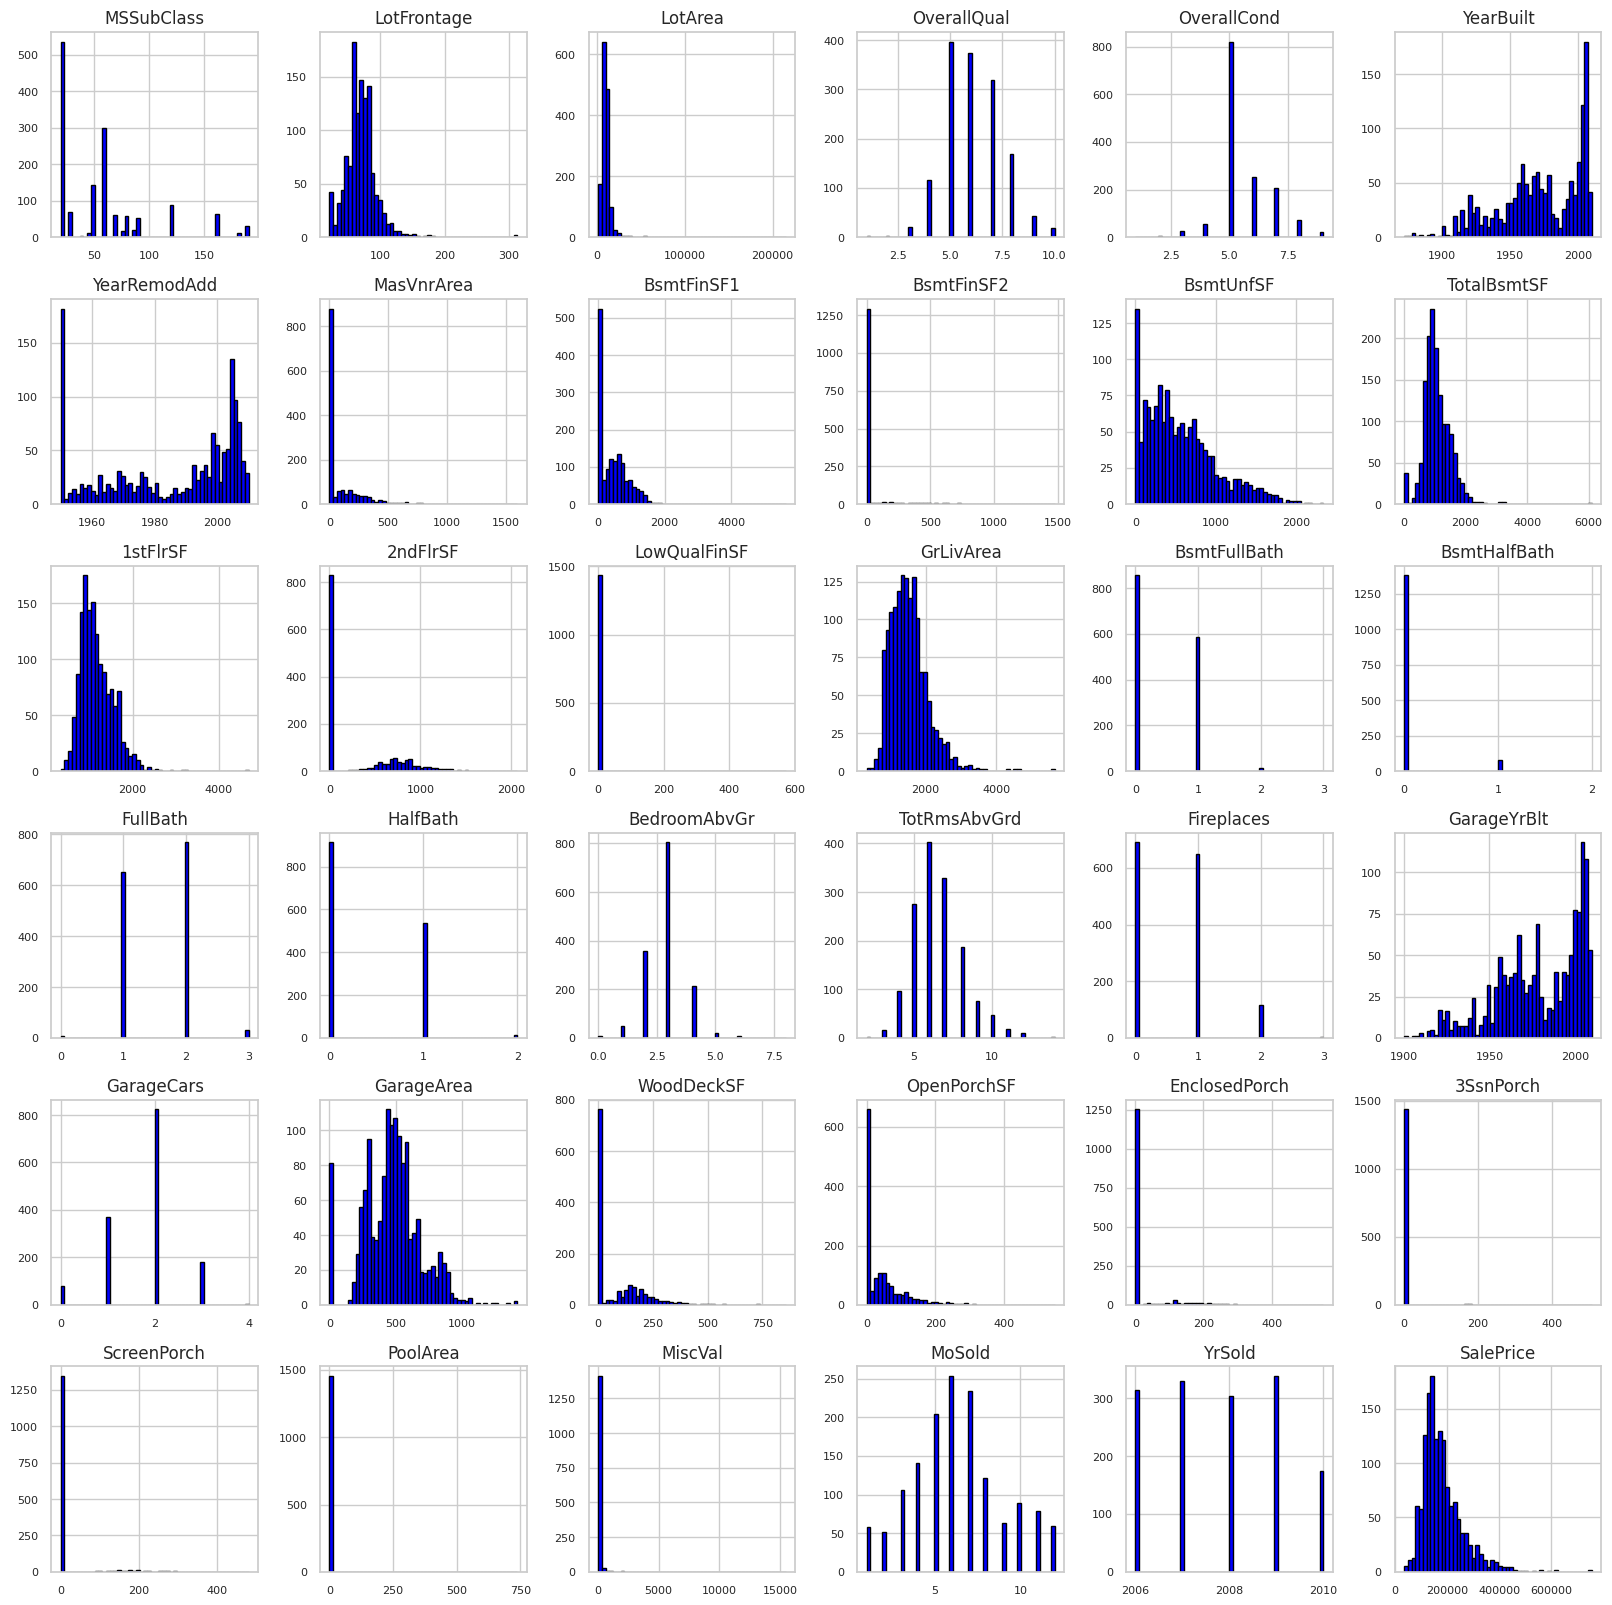

In [144]:
fig_ = df_train_num.hist(
    figsize=(20, 20),
    bins=50,
    color="blue",
    edgecolor="black",
    xlabelsize=8,
    ylabelsize=8,
)

In [145]:
# Heatmap for all the remaining numerical data including the target "SalePrice"

# Define the heatmap parameters

pd.options.display.float_format = "{:,.2f}".format

In [146]:
corr_matrix = df_train_num.corr()
corr_matrix

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
MSSubClass           1.00        -0.39    -0.14         0.03        -0.06   
LotFrontage         -0.39         1.00     0.43         0.25        -0.06   
LotArea             -0.14         0.43     1.00         0.11        -0.01   
OverallQual          0.03         0.25     0.11         1.00        -0.09   
OverallCond         -0.06        -0.06    -0.01        -0.09         1.00   
YearBuilt            0.03         0.12     0.01         0.57        -0.38   
YearRemodAdd         0.04         0.09     0.01         0.55         0.07   
MasVnrArea           0.02         0.19     0.10         0.41        -0.13   
BsmtFinSF1          -0.07         0.23     0.21         0.24        -0.05   
BsmtFinSF2          -0.07         0.05     0.11        -0.06         0.04   
BsmtUnfSF           -0.14         0.13    -0.00         0.31        -0.14   
TotalBsmtSF         -0.24         0.39     0.26         0.54        -0.17   
1stFlrSF            -0.25         0.46     0.30         0.48        -0.14   
2ndFlrSF             0.31         0.08     0.05         0.30         0.03   
LowQualFinSF         0.05         0.04     0.00        -0.03         0.03   
GrLivArea            0.07         0.40     0.26         0.59        -0.08   
BsmtFullBath         0.00         0.10     0.16         0.11        -0.05   
BsmtHalfBath        -0.00        -0.01     0.05        -0.04         0.12   
FullBath             0.13         0.20     0.13         0.55        -0.19   
HalfBath             0.18         0.05     0.01         0.27        -0.06   
BedroomAbvGr        -0.02         0.26     0.12         0.10         0.01   
TotRmsAbvGrd         0.04         0.35     0.19         0.43        -0.06   
Fireplaces          -0.05         0.27     0.27         0.40        -0.02   
GarageYrBlt          0.09         0.07    -0.02         0.55        -0.32   
GarageCars          -0.04         0.29     0.15         0.60        -0.19   
GarageArea          -0.10         0.34     0.18         0.56        -0.15   
WoodDeckSF          -0.01         0.09     0.17         0.24        -0.00   
OpenPorchSF         -0.01         0.15     0.08         0.31        -0.03   
EnclosedPorch       -0.01         0.01    -0.02        -0.11         0.07   
3SsnPorch           -0.04         0.07     0.02         0.03         0.03   
ScreenPorch         -0.03         0.04     0.04         0.06         0.05   
PoolArea             0.01         0.21     0.08         0.07        -0.00   
MiscVal             -0.01         0.00     0.04        -0.03         0.07   
MoSold              -0.01         0.01     0.00         0.07        -0.00   
YrSold              -0.02         0.01    -0.01        -0.03         0.04   
SalePrice           -0.08         0.35     0.26         0.79        -0.08   

               YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
MSSubClass          0.03          0.04        0.02       -0.07       -0.07   
LotFrontage         0.12          0.09        0.19        0.23        0.05   
LotArea             0.01          0.01        0.10        0.21        0.11   
OverallQual         0.57          0.55        0.41        0.24       -0.06   
OverallCond        -0.38          0.07       -0.13       -0.05        0.04   
YearBuilt           1.00          0.59        0.32        0.25       -0.05   
YearRemodAdd        0.59          1.00        0.18        0.13       -0.07   
MasVnrArea          0.32          0.18        1.00        0.26       -0.07   
BsmtFinSF1          0.25          0.13        0.26        1.00       -0.05   
BsmtFinSF2         -0.05         -0.07       -0.07       -0.05        1.00   
BsmtUnfSF           0.15          0.18        0.11       -0.50       -0.21   
TotalBsmtSF         0.39          0.29        0.36        0.52        0.10   
1stFlrSF            0.28          0.24        0.34        0.45        0.10   
2ndFlrSF            0.01          0.14        0.17       -0.14       -0.1

In [147]:
low_corr_filter = (corr_matrix < 0.3) & (corr_matrix > -0.3)
corr_matrix[low_corr_filter] = 0
corr_matrix

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
MSSubClass           1.00        -0.39     0.00         0.00         0.00   
LotFrontage         -0.39         1.00     0.43         0.00         0.00   
LotArea              0.00         0.43     1.00         0.00         0.00   
OverallQual          0.00         0.00     0.00         1.00         0.00   
OverallCond          0.00         0.00     0.00         0.00         1.00   
YearBuilt            0.00         0.00     0.00         0.57        -0.38   
YearRemodAdd         0.00         0.00     0.00         0.55         0.00   
MasVnrArea           0.00         0.00     0.00         0.41         0.00   
BsmtFinSF1           0.00         0.00     0.00         0.00         0.00   
BsmtFinSF2           0.00         0.00     0.00         0.00         0.00   
BsmtUnfSF            0.00         0.00     0.00         0.31         0.00   
TotalBsmtSF          0.00         0.39     0.00         0.54         0.00   
1stFlrSF             0.00         0.46     0.00         0.48         0.00   
2ndFlrSF             0.31         0.00     0.00         0.00         0.00   
LowQualFinSF         0.00         0.00     0.00         0.00         0.00   
GrLivArea            0.00         0.40     0.00         0.59         0.00   
BsmtFullBath         0.00         0.00     0.00         0.00         0.00   
BsmtHalfBath         0.00         0.00     0.00         0.00         0.00   
FullBath             0.00         0.00     0.00         0.55         0.00   
HalfBath             0.00         0.00     0.00         0.00         0.00   
BedroomAbvGr         0.00         0.00     0.00         0.00         0.00   
TotRmsAbvGrd         0.00         0.35     0.00         0.43         0.00   
Fireplaces           0.00         0.00     0.00         0.40         0.00   
GarageYrBlt          0.00         0.00     0.00         0.55        -0.32   
GarageCars           0.00         0.00     0.00         0.60         0.00   
GarageArea           0.00         0.34     0.00         0.56         0.00   
WoodDeckSF           0.00         0.00     0.00         0.00         0.00   
OpenPorchSF          0.00         0.00     0.00         0.31         0.00   
EnclosedPorch        0.00         0.00     0.00         0.00         0.00   
3SsnPorch            0.00         0.00     0.00         0.00         0.00   
ScreenPorch          0.00         0.00     0.00         0.00         0.00   
PoolArea             0.00         0.00     0.00         0.00         0.00   
MiscVal              0.00         0.00     0.00         0.00         0.00   
MoSold               0.00         0.00     0.00         0.00         0.00   
YrSold               0.00         0.00     0.00         0.00         0.00   
SalePrice            0.00         0.35     0.00         0.79         0.00   

               YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
MSSubClass          0.00          0.00        0.00        0.00        0.00   
LotFrontage         0.00          0.00        0.00        0.00        0.00   
LotArea             0.00          0.00        0.00        0.00        0.00   
OverallQual         0.57          0.55        0.41        0.00        0.00   
OverallCond        -0.38          0.00        0.00        0.00        0.00   
YearBuilt           1.00          0.59        0.32        0.00        0.00   
YearRemodAdd        0.59          1.00        0.00        0.00        0.00   
MasVnrArea          0.32          0.00        1.00        0.00        0.00   
BsmtFinSF1          0.00          0.00        0.00        1.00        0.00   
BsmtFinSF2          0.00          0.00        0.00        0.00        1.00   
BsmtUnfSF           0.00          0.00        0.00       -0.50        0.00   
TotalBsmtSF         0.39          0.00        0.36        0.52        0.00   
1stFlrSF            0.00          0.00        0.34        0.45        0.00   
2ndFlrSF            0.00          0.00        0.00        0.00        0.0

In [148]:
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
mask

array([[ True,  True,  True, ...,  True,  True,  True],
       [False,  True,  True, ...,  True,  True,  True],
       [False, False,  True, ...,  True,  True,  True],
       ...,
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ..., False,  True,  True],
       [False, False, False, ..., False, False,  True]])

<Axes: >

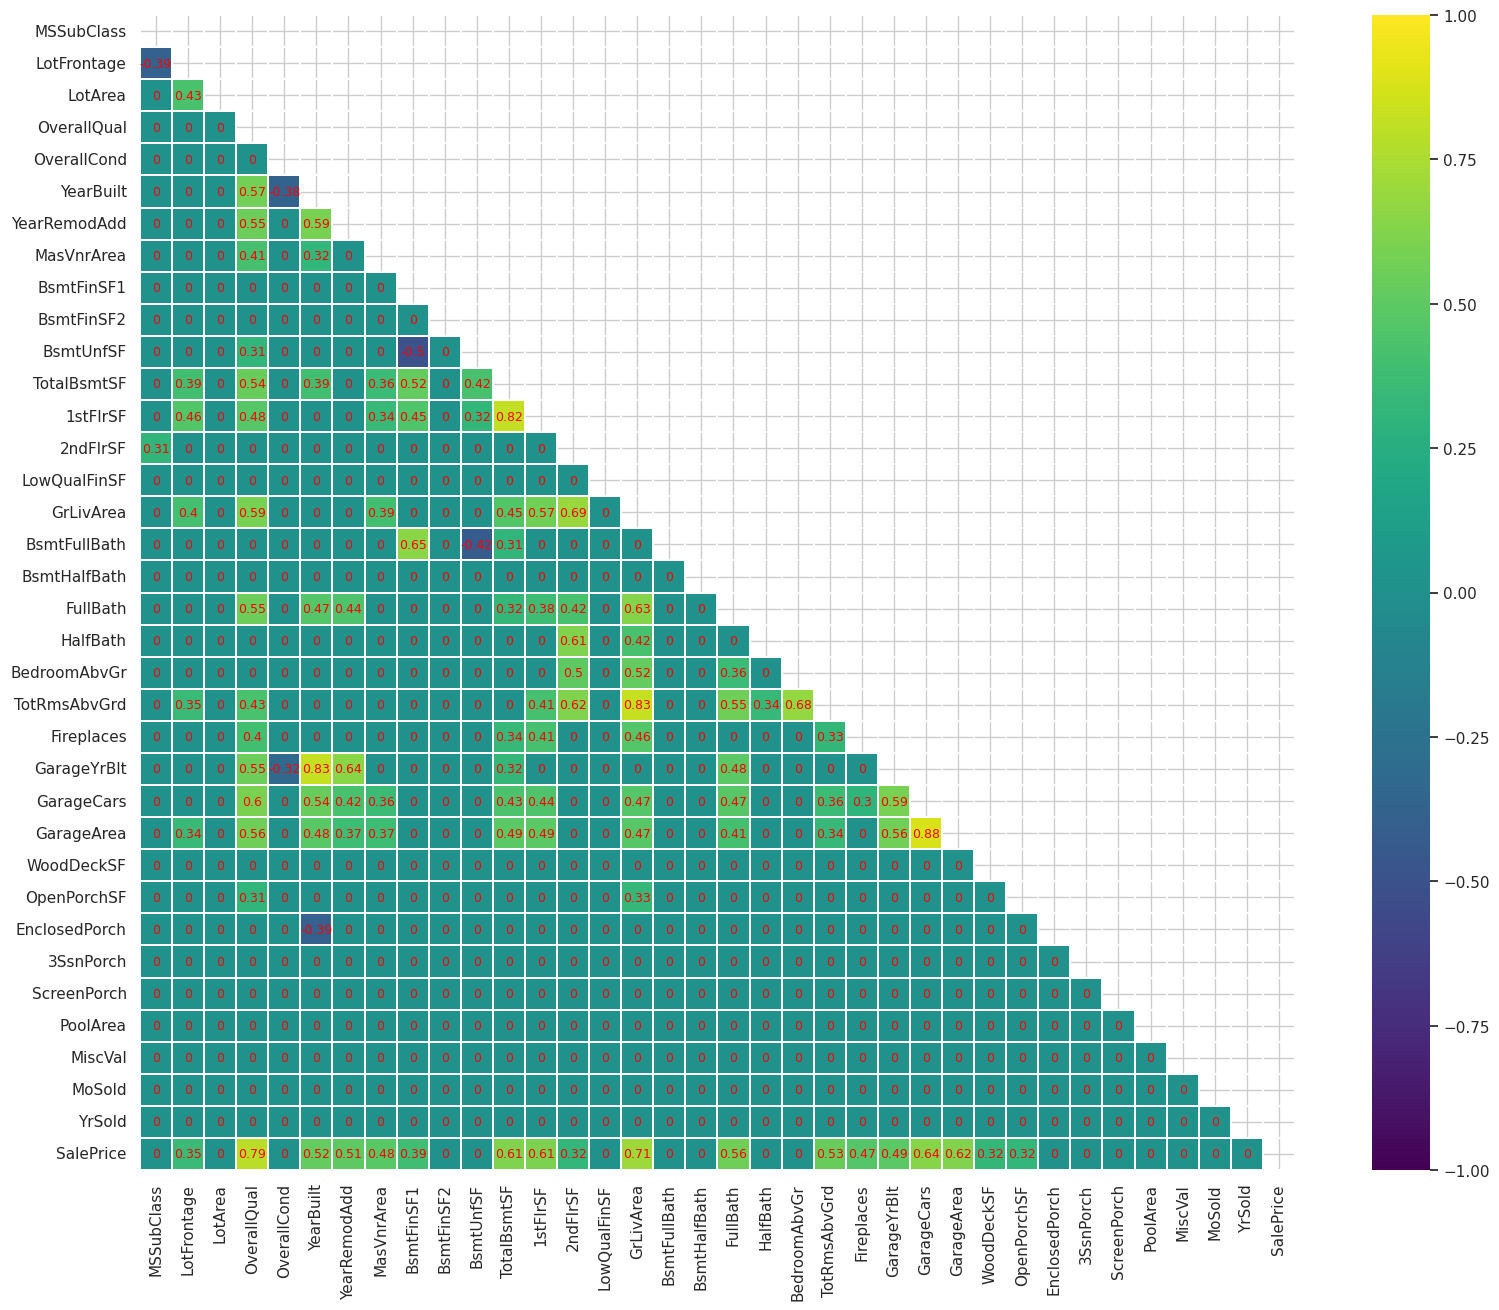

In [149]:
# color of map
cmap = 'viridis'

# plot heatmap
sns.heatmap(
    data = corr_matrix,
    mask = mask,
    vmax = 1.0,
    vmin = -1.0,
    linewidths = 0.1,
    annot_kws = {
        'size' : 9,
        'color' : 'red'
    },
    square = True,
    cmap = cmap,
    annot = True
)

In [150]:
# lets select feature where the correlation with "SalePrice" is higher than |0.3|
# -1 because the latest row is SalePrice

df_num_corr = df_train_num.corr()['SalePrice'][:-1]

# Correlation features (r2 > 0.5)
high_feature_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print(f"{len(high_feature_list)} strongly correlated values with SalePrice: \n{high_feature_list}\n")

# Correlation feature (0.3 < r2 < 0.5)
low_feature_list = df_num_corr[(abs(df_num_corr) < 0.5) & (abs(df_num_corr) >= 0.3)].sort_values(ascending=False)
print(f"{len(low_feature_list)} slightly correlated values with SalePrice: \n{low_feature_list}")

10 strongly correlated values with SalePrice: 
OverallQual    0.79
GrLivArea      0.71
GarageCars     0.64
GarageArea     0.62
TotalBsmtSF    0.61
1stFlrSF       0.61
FullBath       0.56
TotRmsAbvGrd   0.53
YearBuilt      0.52
YearRemodAdd   0.51
Name: SalePrice, dtype: float64

8 slightly correlated values with SalePrice: 
GarageYrBlt   0.49
MasVnrArea    0.48
Fireplaces    0.47
BsmtFinSF1    0.39
LotFrontage   0.35
WoodDeckSF    0.32
2ndFlrSF      0.32
OpenPorchSF   0.32
Name: SalePrice, dtype: float64


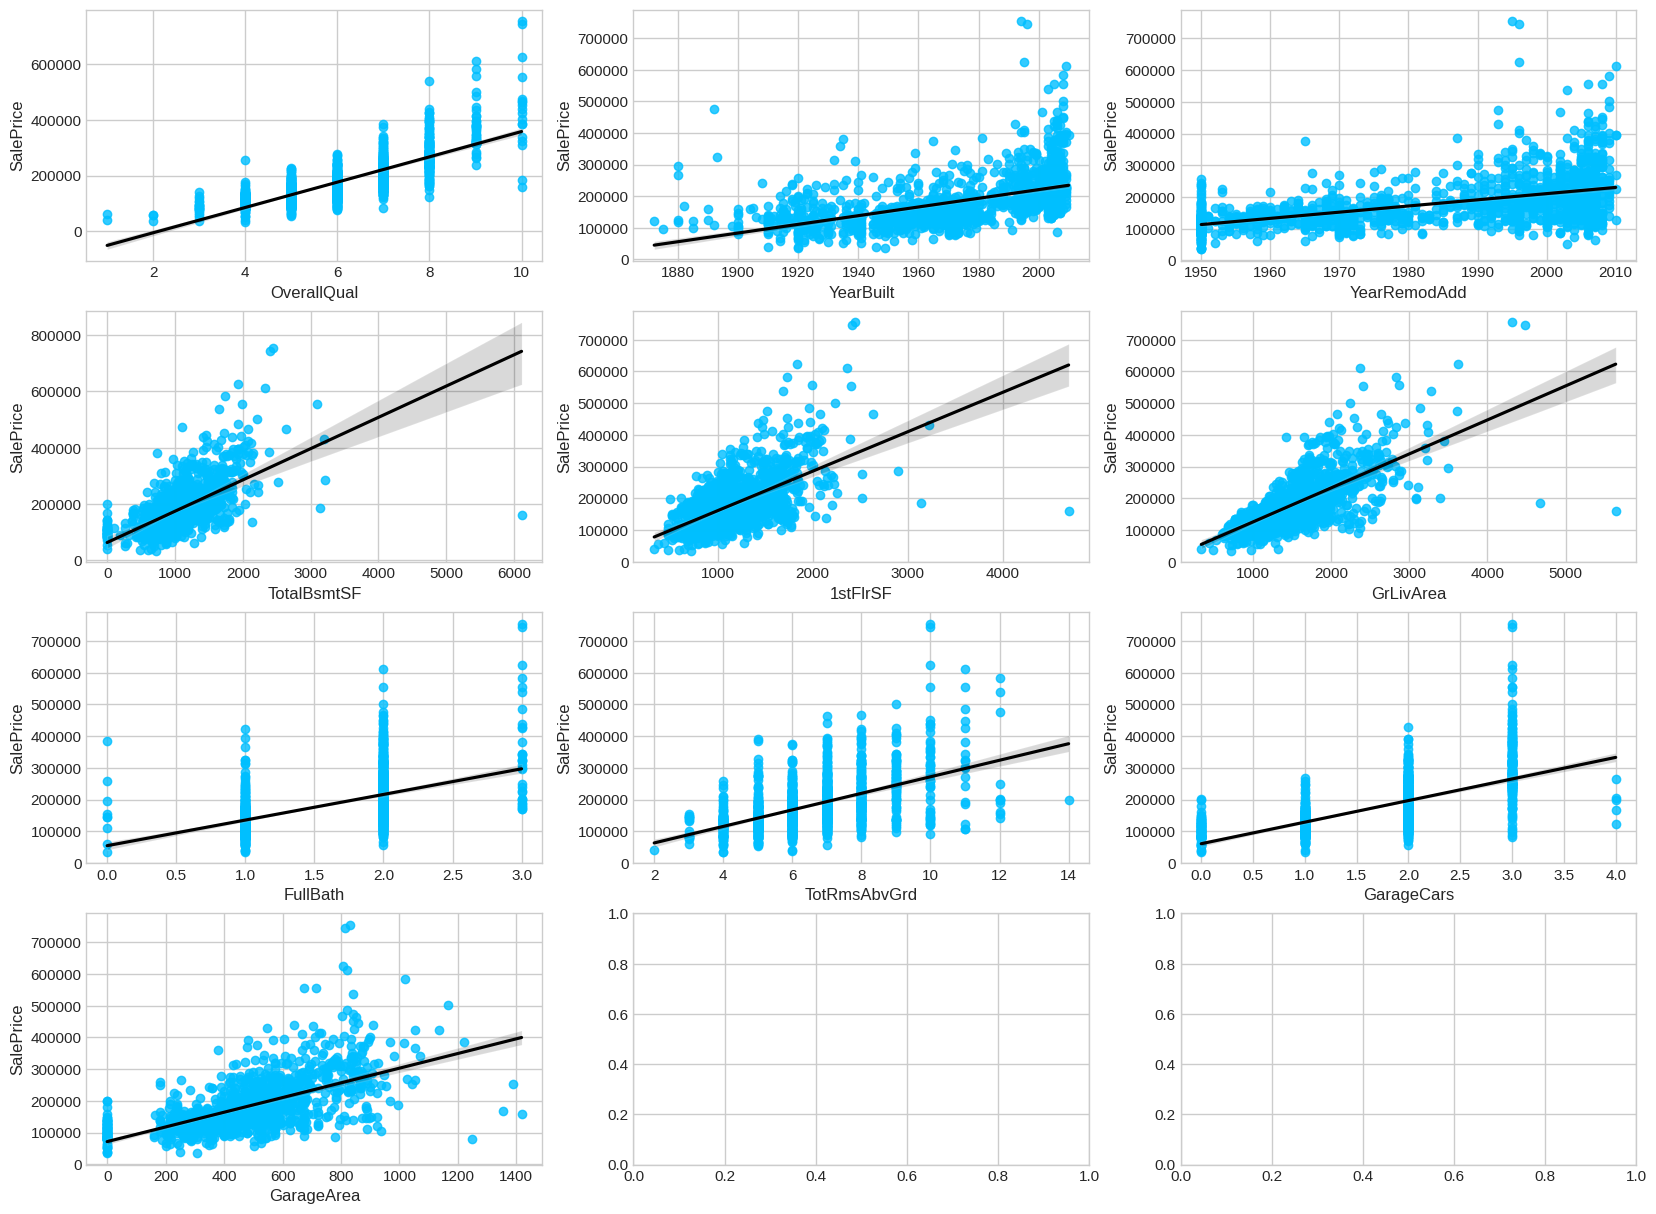

In [151]:
strong_features = df_num_corr[abs(df_num_corr) > 0.5].index.tolist()
strong_features.append('SalePrice')

df_strong_features = df_train_num.loc[:, strong_features]

plt.style.use('seaborn-whitegrid')
fig , ax = plt.subplots(round(len(strong_features) / 3), 3)

for i, ax in enumerate(fig.axes):
  if i < len(strong_features)-1:
    sns.regplot(
        x=strong_features[i],
        y='SalePrice',
        data=df_strong_features,
        ax=ax,
        scatter_kws={
            'color' : 'deepskyblue',
        },
        line_kws={
            'color' : 'black'
        }
    )

In [152]:
df_strong_features

OverallQual  YearBuilt  YearRemodAdd  TotalBsmtSF  1stFlrSF  GrLivArea  \
0               7       2003          2003          856       856       1710   
1               6       1976          1976         1262      1262       1262   
2               7       2001          2002          920       920       1786   
3               7       1915          1970          756       961       1717   
4               8       2000          2000         1145      1145       2198   
...           ...        ...           ...          ...       ...        ...   
1455            6       1999          2000          953       953       1647   
1456            6       1978          1988         1542      2073       2073   
1457            7       1941          2006         1152      1188       2340   
1458            5       1950          1996         1078      1078       1078   
1459            5       1965          1965         1256      1256       1256   

      FullBath  TotRmsAbvGrd  GarageCars  GarageArea  SalePrice  
0            2             8           2         548     208500  
1            2             6           2         460     181500  
2            2             6           2         608     223500  
3            1             7           3         642     140000  
4            2             9           3         836     250000  
...        ...           ...         ...         ...        ...  
1455         2             7           2         460     175000  
1456         2             7           2         500     210000  
1457         2             9           1         252     266500  
1458         1             5           1         240     142125  
1459         1             6           1         276     147500  

[1460 rows x 11 columns]

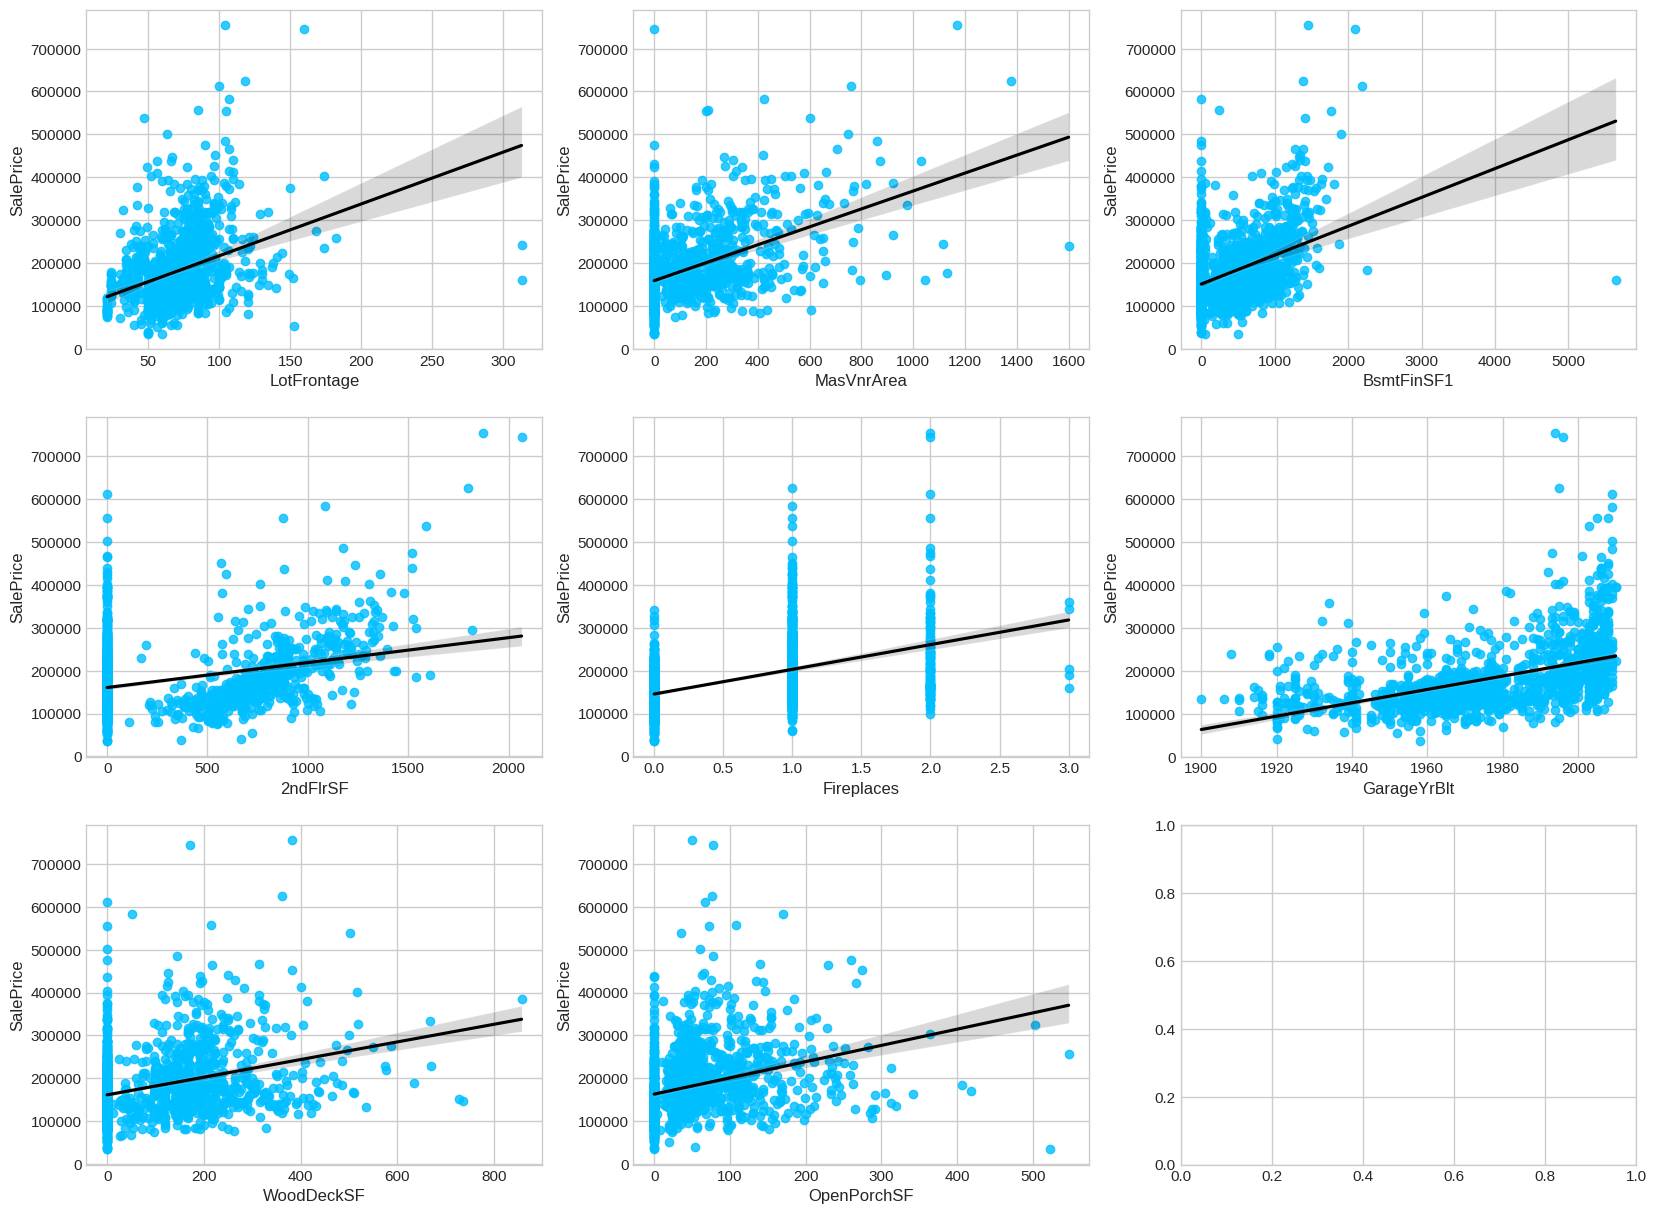

In [153]:
low_features = df_num_corr[(abs(df_num_corr) < 0.5) & (abs(df_num_corr) >= 0.3)].index.tolist()
low_features.append('SalePrice')

df_low_features = df_train_num.loc[:, low_features]

plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(round(len(low_features) / 3), 3)

for i, ax in enumerate(fig.axes):
  if i < len(low_features) - 1 :
    sns.regplot(
        x=low_features[i],
        y='SalePrice',
        data=df_low_features,
        ax=ax,
        scatter_kws={'color' : 'deepskyblue'},
        line_kws={'color' : 'black'}
    )

In [154]:
list_of_numerical_features = strong_features[:-1] + low_features
df_train_num = df_train_num.loc[:, list_of_numerical_features]
df_test_num = df_test.loc[:, list_of_numerical_features[:-1]]

## Missing data of Numerical features

**TRAIN SET**

Text(0, 0.5, 'Column Name\n')

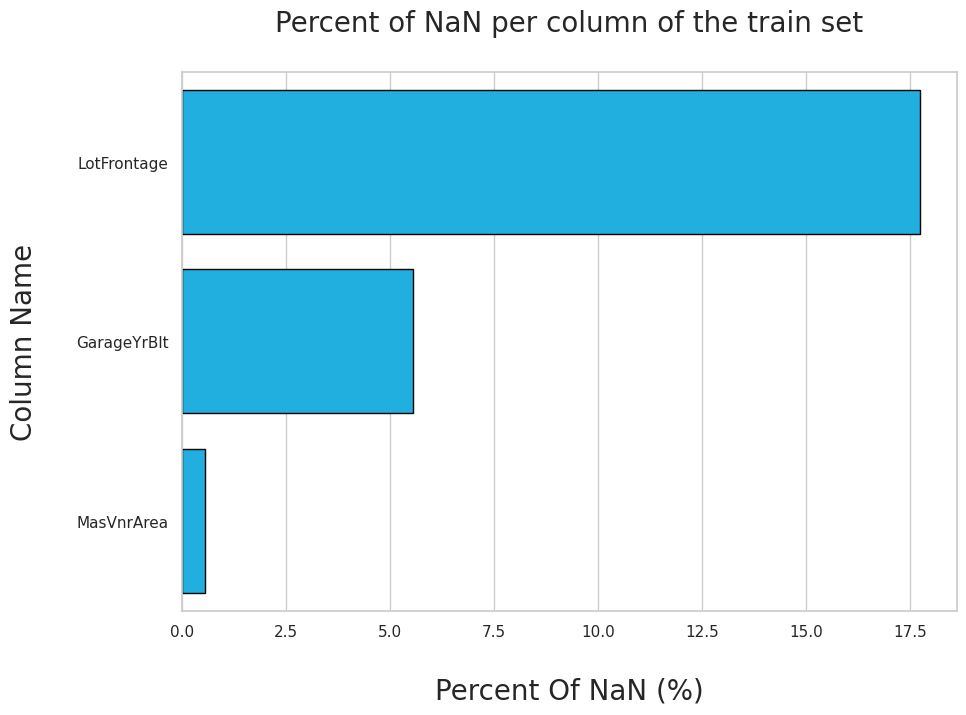

In [155]:
column_with_nan = df_train_num.columns[df_train_num.isna().any()]
columns_name = []
percent_nan = []

for i in column_with_nan:
  columns_name.append(i)
  percent_nan.append(round(df_train_num[i].isna().sum()*100/len(df_train_num), 2))

tab = pd.DataFrame(columns_name, columns=['Columns'])
tab['Percent_NaN'] = percent_nan
tab.sort_values(by=['Percent_NaN'], ascending=False, inplace=True)

sns.set(rc={'figure.figsize': (10, 7)})
sns.set_style('whitegrid')

p = sns.barplot(
    x='Percent_NaN',
    y='Columns',
    data=tab,
    edgecolor='black',
    color='deepskyblue'
)

p.set_title('Percent of NaN per column of the train set\n', fontsize=20)
p.set_xlabel('\nPercent Of NaN (%)', fontsize=20)
p.set_ylabel('Column Name\n', fontsize=20)

In [156]:
impute = SimpleImputer(strategy='median')
df_train_imputed = pd.DataFrame(
    impute.fit_transform(df_train_num)
)
df_train_imputed.head()

0        1        2        3        4        5    6    7    8      9   \
0 7.00 2,003.00 2,003.00   856.00   856.00 1,710.00 2.00 8.00 2.00 548.00   
1 6.00 1,976.00 1,976.00 1,262.00 1,262.00 1,262.00 2.00 6.00 2.00 460.00   
2 7.00 2,001.00 2,002.00   920.00   920.00 1,786.00 2.00 6.00 2.00 608.00   
3 7.00 1,915.00 1,970.00   756.00   961.00 1,717.00 1.00 7.00 3.00 642.00   
4 8.00 2,000.00 2,000.00 1,145.00 1,145.00 2,198.00 2.00 9.00 3.00 836.00   

     10     11     12       13   14       15     16    17         18  
0 65.00 196.00 706.00   854.00 0.00 2,003.00   0.00 61.00 208,500.00  
1 80.00   0.00 978.00     0.00 1.00 1,976.00 298.00  0.00 181,500.00  
2 68.00 162.00 486.00   866.00 1.00 2,001.00   0.00 42.00 223,500.00  
3 60.00   0.00 216.00   756.00 1.00 1,998.00   0.00 35.00 140,000.00  
4 84.00 350.00 655.00 1,053.00 1.00 2,000.00 192.00 84.00 250,000.00

In [157]:
df_train_imputed.columns = df_train_num.columns
df_train_imputed.head()

OverallQual  YearBuilt  YearRemodAdd  TotalBsmtSF  1stFlrSF  GrLivArea  \
0         7.00   2,003.00      2,003.00       856.00    856.00   1,710.00   
1         6.00   1,976.00      1,976.00     1,262.00  1,262.00   1,262.00   
2         7.00   2,001.00      2,002.00       920.00    920.00   1,786.00   
3         7.00   1,915.00      1,970.00       756.00    961.00   1,717.00   
4         8.00   2,000.00      2,000.00     1,145.00  1,145.00   2,198.00   

   FullBath  TotRmsAbvGrd  GarageCars  GarageArea  LotFrontage  MasVnrArea  \
0      2.00          8.00        2.00      548.00        65.00      196.00   
1      2.00          6.00        2.00      460.00        80.00        0.00   
2      2.00          6.00        2.00      608.00        68.00      162.00   
3      1.00          7.00        3.00      642.00        60.00        0.00   
4      2.00          9.00        3.00      836.00        84.00      350.00   

   BsmtFinSF1  2ndFlrSF  Fireplaces  GarageYrBlt  WoodDeckSF  OpenPorchSF  \
0      706.00    854.00        0.00     2,003.00        0.00        61.00   
1      978.00      0.00        1.00     1,976.00      298.00         0.00   
2      486.00    866.00        1.00     2,001.00        0.00        42.00   
3      216.00    756.00        1.00     1,998.00        0.00        35.00   
4      655.00  1,053.00        1.00     2,000.00      192.00        84.00   

   SalePrice  
0 208,500.00  
1 181,500.00  
2 223,500.00  
3 140,000.00  
4 250,000.00

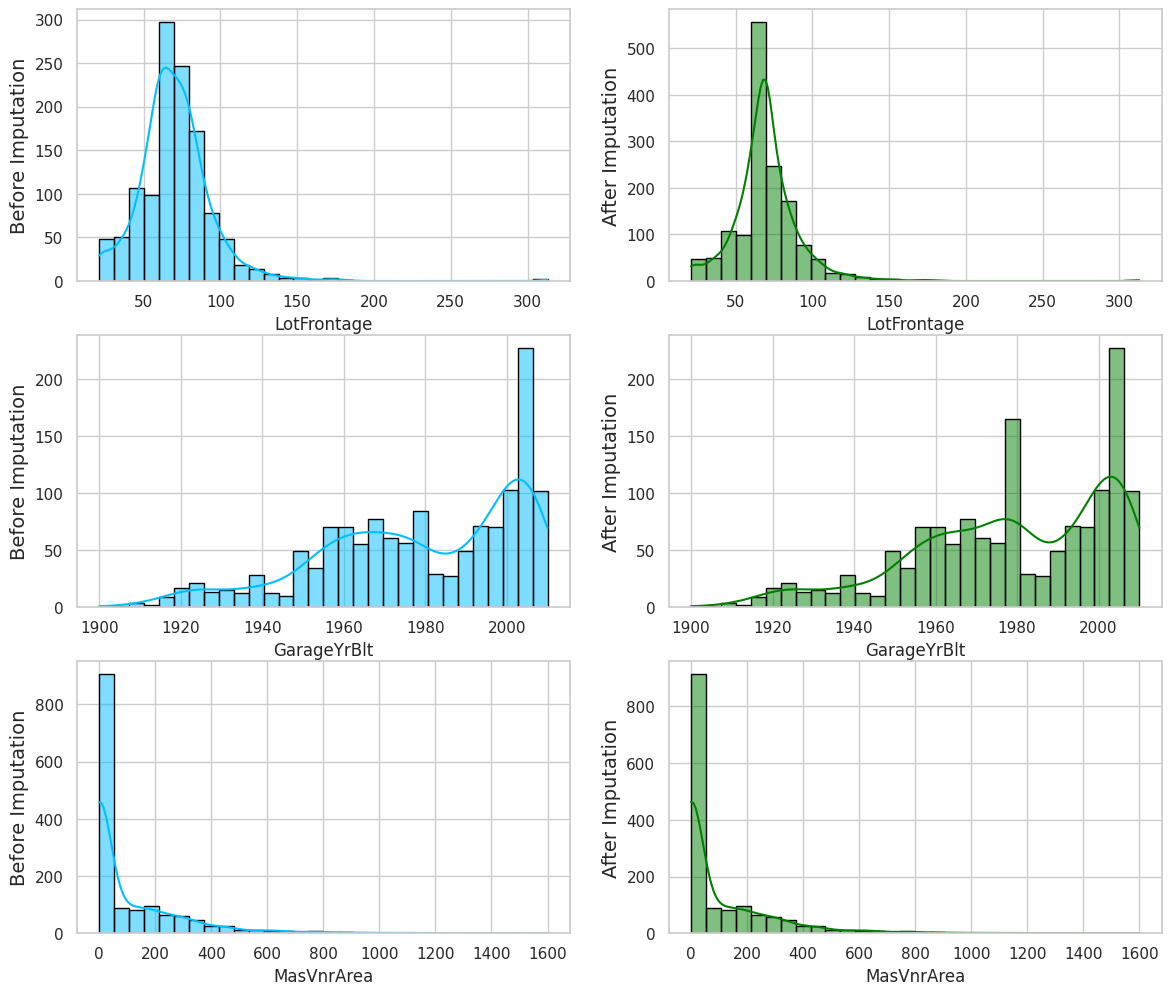

In [158]:
sns.set(rc={'figure.figsize' : (14, 12)})
sns.set_style('whitegrid')
fig , axes = plt.subplots(3, 2)

for feature, fig_pos in zip(['LotFrontage', 'GarageYrBlt', 'MasVnrArea'], [0, 1, 2]):
  """ Features distribution before and after imputation """

  # Before imputation
  p = sns.histplot(ax=axes[fig_pos, 0], x=df_train_num[feature],
                   kde=True, bins=30, color='deepskyblue', edgecolor='black')
  p.set_ylabel(f"Before Imputation", fontsize=14)

  # After Imputation
  q = sns.histplot(ax=axes[fig_pos, 1], x=df_train_imputed[feature],
                   kde=True, bins=30, color='green', edgecolor='black')
  q.set_ylabel(f"After Imputation", fontsize=14)

In [159]:
df_train_imputed.drop(['LotFrontage', 'GarageYrBlt'], axis=1, inplace=True)
df_train_imputed.head()

OverallQual  YearBuilt  YearRemodAdd  TotalBsmtSF  1stFlrSF  GrLivArea  \
0         7.00   2,003.00      2,003.00       856.00    856.00   1,710.00   
1         6.00   1,976.00      1,976.00     1,262.00  1,262.00   1,262.00   
2         7.00   2,001.00      2,002.00       920.00    920.00   1,786.00   
3         7.00   1,915.00      1,970.00       756.00    961.00   1,717.00   
4         8.00   2,000.00      2,000.00     1,145.00  1,145.00   2,198.00   

   FullBath  TotRmsAbvGrd  GarageCars  GarageArea  MasVnrArea  BsmtFinSF1  \
0      2.00          8.00        2.00      548.00      196.00      706.00   
1      2.00          6.00        2.00      460.00        0.00      978.00   
2      2.00          6.00        2.00      608.00      162.00      486.00   
3      1.00          7.00        3.00      642.00        0.00      216.00   
4      2.00          9.00        3.00      836.00      350.00      655.00   

   2ndFlrSF  Fireplaces  WoodDeckSF  OpenPorchSF  SalePrice  
0    854.00        0.00        0.00        61.00 208,500.00  
1      0.00        1.00      298.00         0.00 181,500.00  
2    866.00        1.00        0.00        42.00 223,500.00  
3    756.00        1.00        0.00        35.00 140,000.00  
4  1,053.00        1.00      192.00        84.00 250,000.00

In [160]:
df_test_num.drop(['LotFrontage', 'GarageYrBlt'], axis=1, inplace=True)

In [161]:
df_test_num.head()

OverallQual  YearBuilt  YearRemodAdd  TotalBsmtSF  1stFlrSF  GrLivArea  \
0            5       1961          1961       882.00       896        896   
1            6       1958          1958     1,329.00      1329       1329   
2            5       1997          1998       928.00       928       1629   
3            6       1998          1998       926.00       926       1604   
4            8       1992          1992     1,280.00      1280       1280   

   FullBath  TotRmsAbvGrd  GarageCars  GarageArea  MasVnrArea  BsmtFinSF1  \
0         1             5        1.00      730.00        0.00      468.00   
1         1             6        1.00      312.00      108.00      923.00   
2         2             6        2.00      482.00        0.00      791.00   
3         2             7        2.00      470.00       20.00      602.00   
4         2             5        2.00      506.00        0.00      263.00   

   2ndFlrSF  Fireplaces  WoodDeckSF  OpenPorchSF  
0         0           0         140            0  
1         0           0         393           36  
2       701           1         212           34  
3       678           1         360           36  
4         0           0           0           82

**TEST SET**

Text(0, 0.5, 'Colomn Name\n')

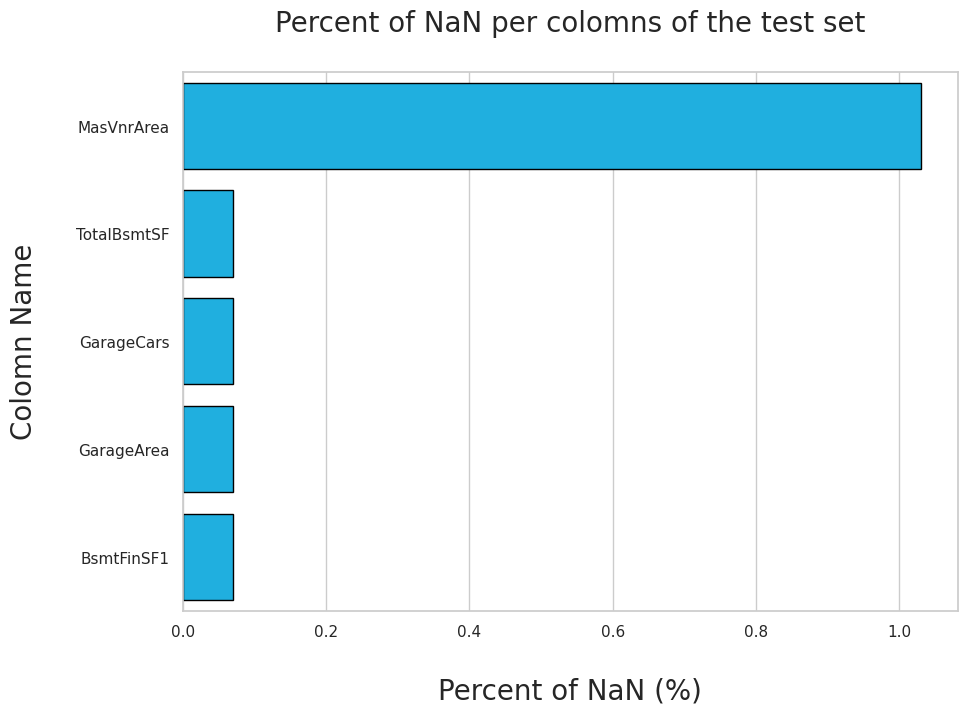

In [162]:
columns_with_nan = df_test_num.columns[df_test_num.isna().any()]
column_name = []
percent_nan = []

for i in columns_with_nan:
  column_name.append(i)
  percent_nan.append(
      round(
          df_test_num[i].isna().sum()*100/len(df_test_num), 2
      )
  )

tab = pd.DataFrame(column_name, columns=['column'])
tab['Percent_NaN'] = percent_nan
tab.sort_values(by=['Percent_NaN'], ascending=False, inplace=True)

sns.set(rc={'figure.figsize': (10, 7)})
sns.set_style('whitegrid')

p = sns.barplot(
    x='Percent_NaN',
    y='column',
    edgecolor='black',
    data=tab,
    color='deepskyblue'
)

p.set_title('Percent of NaN per colomns of the test set\n', fontsize=20)
p.set_xlabel('\nPercent of NaN (%)', fontsize=20)
p.set_ylabel('Colomn Name\n', fontsize=20)

In [163]:
imputer = SimpleImputer(strategy='median')
df_test_imputed = pd.DataFrame(imputer.fit_transform(df_test_num))
df_test_imputed.columns = df_test_num.columns

In [164]:
df_test_imputed

OverallQual  YearBuilt  YearRemodAdd  TotalBsmtSF  1stFlrSF  GrLivArea  \
0            5.00   1,961.00      1,961.00       882.00    896.00     896.00   
1            6.00   1,958.00      1,958.00     1,329.00  1,329.00   1,329.00   
2            5.00   1,997.00      1,998.00       928.00    928.00   1,629.00   
3            6.00   1,998.00      1,998.00       926.00    926.00   1,604.00   
4            8.00   1,992.00      1,992.00     1,280.00  1,280.00   1,280.00   
...           ...        ...           ...          ...       ...        ...   
1454         4.00   1,970.00      1,970.00       546.00    546.00   1,092.00   
1455         4.00   1,970.00      1,970.00       546.00    546.00   1,092.00   
1456         5.00   1,960.00      1,996.00     1,224.00  1,224.00   1,224.00   
1457         5.00   1,992.00      1,992.00       912.00    970.00     970.00   
1458         7.00   1,993.00      1,994.00       996.00    996.00   2,000.00   

      FullBath  TotRmsAbvGrd  GarageCars  GarageArea  MasVnrArea  BsmtFinSF1  \
0         1.00          5.00        1.00      730.00        0.00      468.00   
1         1.00          6.00        1.00      312.00      108.00      923.00   
2         2.00          6.00        2.00      482.00        0.00      791.00   
3         2.00          7.00        2.00      470.00       20.00      602.00   
4         2.00          5.00        2.00      506.00        0.00      263.00   
...        ...           ...         ...         ...         ...         ...   
1454      1.00          5.00        0.00        0.00        0.00        0.00   
1455      1.00          6.00        1.00      286.00        0.00      252.00   
1456      1.00          7.00        2.00      576.00        0.00    1,224.00   
1457      1.00          6.00        0.00        0.00        0.00      337.00   
1458      2.00          9.00        3.00      650.00       94.00      758.00   

      2ndFlrSF  Fireplaces  WoodDeckSF  OpenPorchSF  
0         0.00        0.00      140.00         0.00  
1         0.00        0.00      393.00        36.00  
2       701.00        1.00      212.00        34.00  
3       678.00        1.00      360.00        36.00  
4         0.00        0.00        0.00        82.00  
...        ...         ...         ...          ...  
1454    546.00        0.00        0.00         0.00  
1455    546.00        0.00        0.00        24.00  
1456      0.00        1.00      474.00         0.00  
1457      0.00        0.00       80.00        32.00  
1458  1,004.00        1.00      190.00        48.00  

[1459 rows x 16 columns]

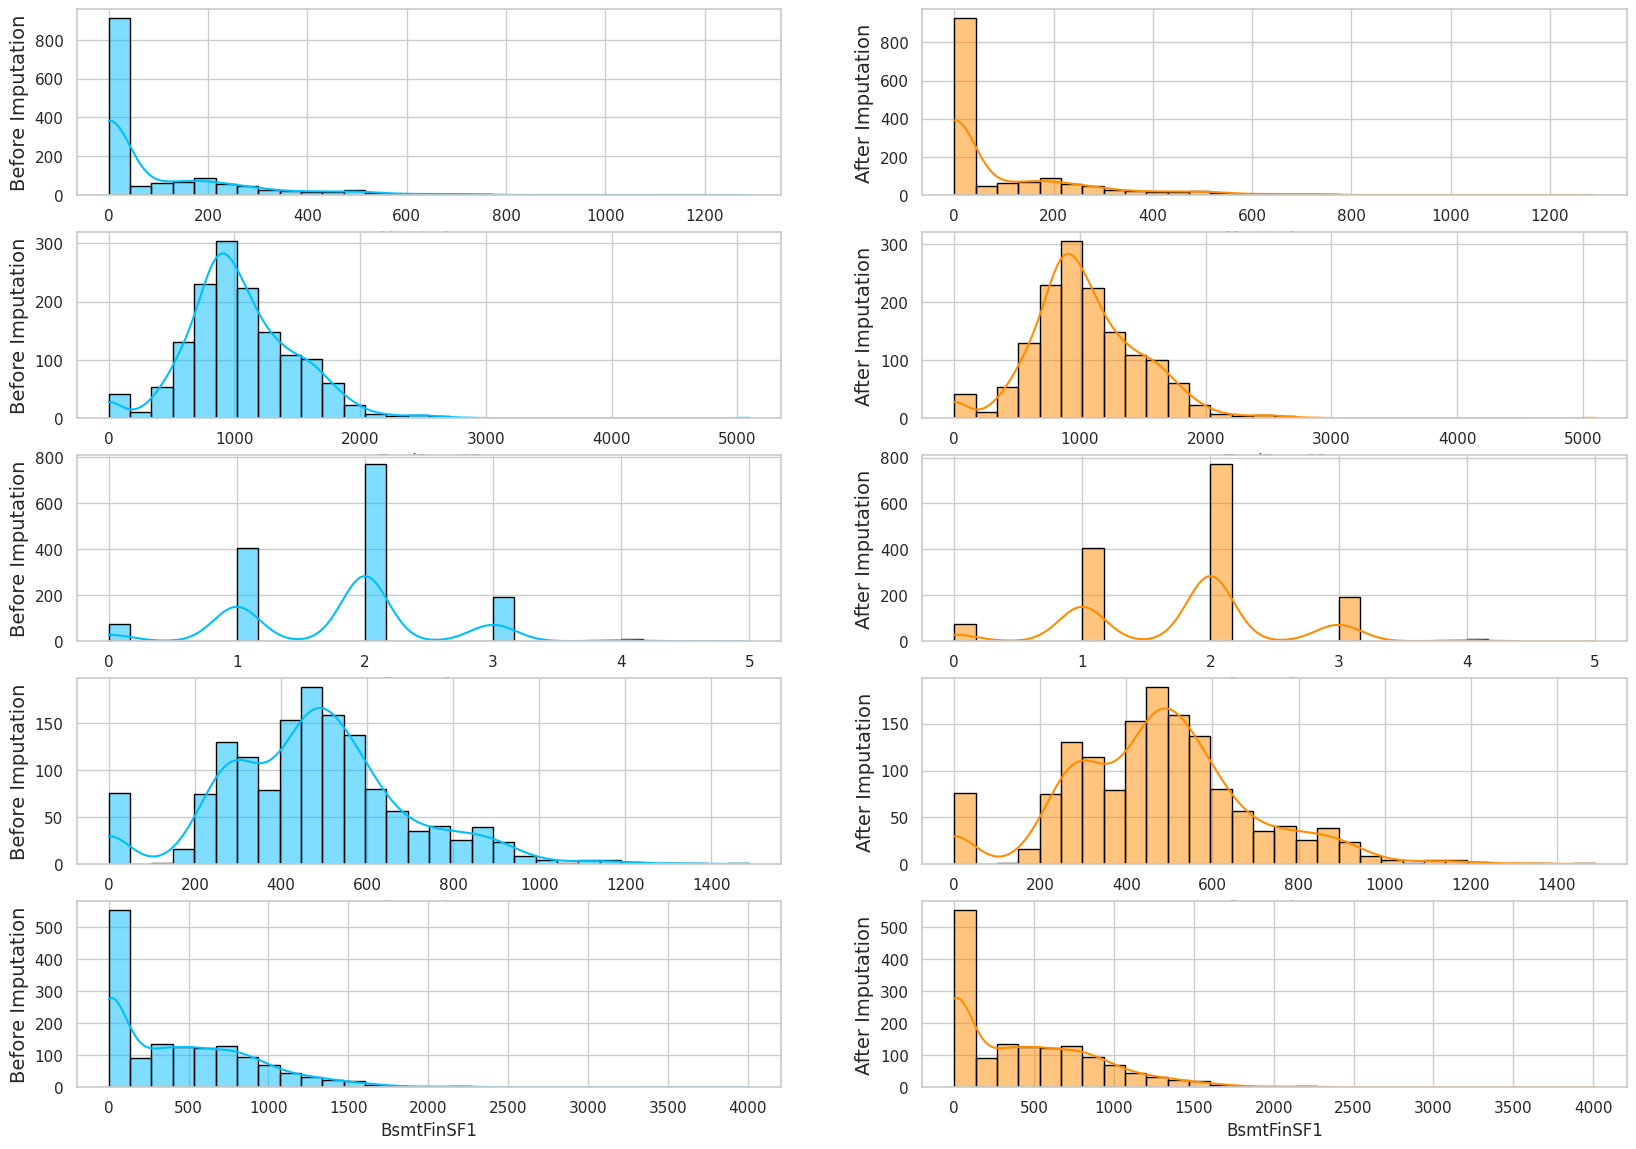

In [165]:
sns.set(rc={'figure.figsize' : (20, 14)})
sns.set_style('whitegrid')
fig, axes = plt.subplots(5, 2)

for feature, fig_pos in zip(tab['column'].tolist(), range(0, 6)):
    p = sns.histplot(
        ax=axes[fig_pos, 0],
        x=df_test_num[feature],
        kde=True,
        bins=30,
        color='deepskyblue',
        edgecolor='black'
    )
    p.set_ylabel('Before Imputation', fontsize=14)

    q = sns.histplot(
        ax=axes[fig_pos, 1],
        x=df_test_imputed[feature],
        kde=True,
        bins=30,
        color='darkorange',
        edgecolor='black'
    )
    q.set_ylabel('After Imputation', fontsize=14)


# Categorical Feature

## Explore and Clean Numerical Feature

In [166]:
df_train.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL        65.00     8450   Pave   NaN      Reg   
1          20       RL        80.00     9600   Pave   NaN      Reg   
2          60       RL        68.00    11250   Pave   NaN      IR1   
3          70       RL        60.00     9550   Pave   NaN      IR1   
4          60       RL        84.00    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
0         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
1         Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
2         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
3         Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
4         Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       0      2    2008        WD         Normal     208500  
1       0      5    2007        WD         Normal     181500  
2       0      9    2008        WD         Normal     223500  
3       0      2    2006        WD        Abnorml     140000  
4       0     12    2008        WD         Normal     250000  

[5 rows x 80 columns]

In [167]:
df_train.info(

)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [168]:
categorical_features = []
for feat, feat_type in zip(df_train.columns, df_train.dtypes):
  if feat_type == "object":
    categorical_features.append(feat)

categorical_features.append('SalePrice')

df_train_categ = df_train[categorical_features]

df_test_categ = df_test[categorical_features[:-1]]

df_train_categ.head()

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1  ... GarageFinish GarageQual GarageCond PavedDrive  \
0      CollgCr       Norm  ...          RFn         TA         TA          Y   
1      Veenker      Feedr  ...          RFn         TA         TA          Y   
2      CollgCr       Norm  ...          RFn         TA         TA          Y   
3      Crawfor       Norm  ...          Unf         TA         TA          Y   
4      NoRidge       Norm  ...          RFn         TA         TA          Y   

  PoolQC Fence MiscFeature SaleType SaleCondition SalePrice  
0    NaN   NaN         NaN       WD        Normal    208500  
1    NaN   NaN         NaN       WD        Normal    181500  
2    NaN   NaN         NaN       WD        Normal    223500  
3    NaN   NaN         NaN       WD       Abnorml    140000  
4    NaN   NaN         NaN       WD        Normal    250000  

[5 rows x 44 columns]

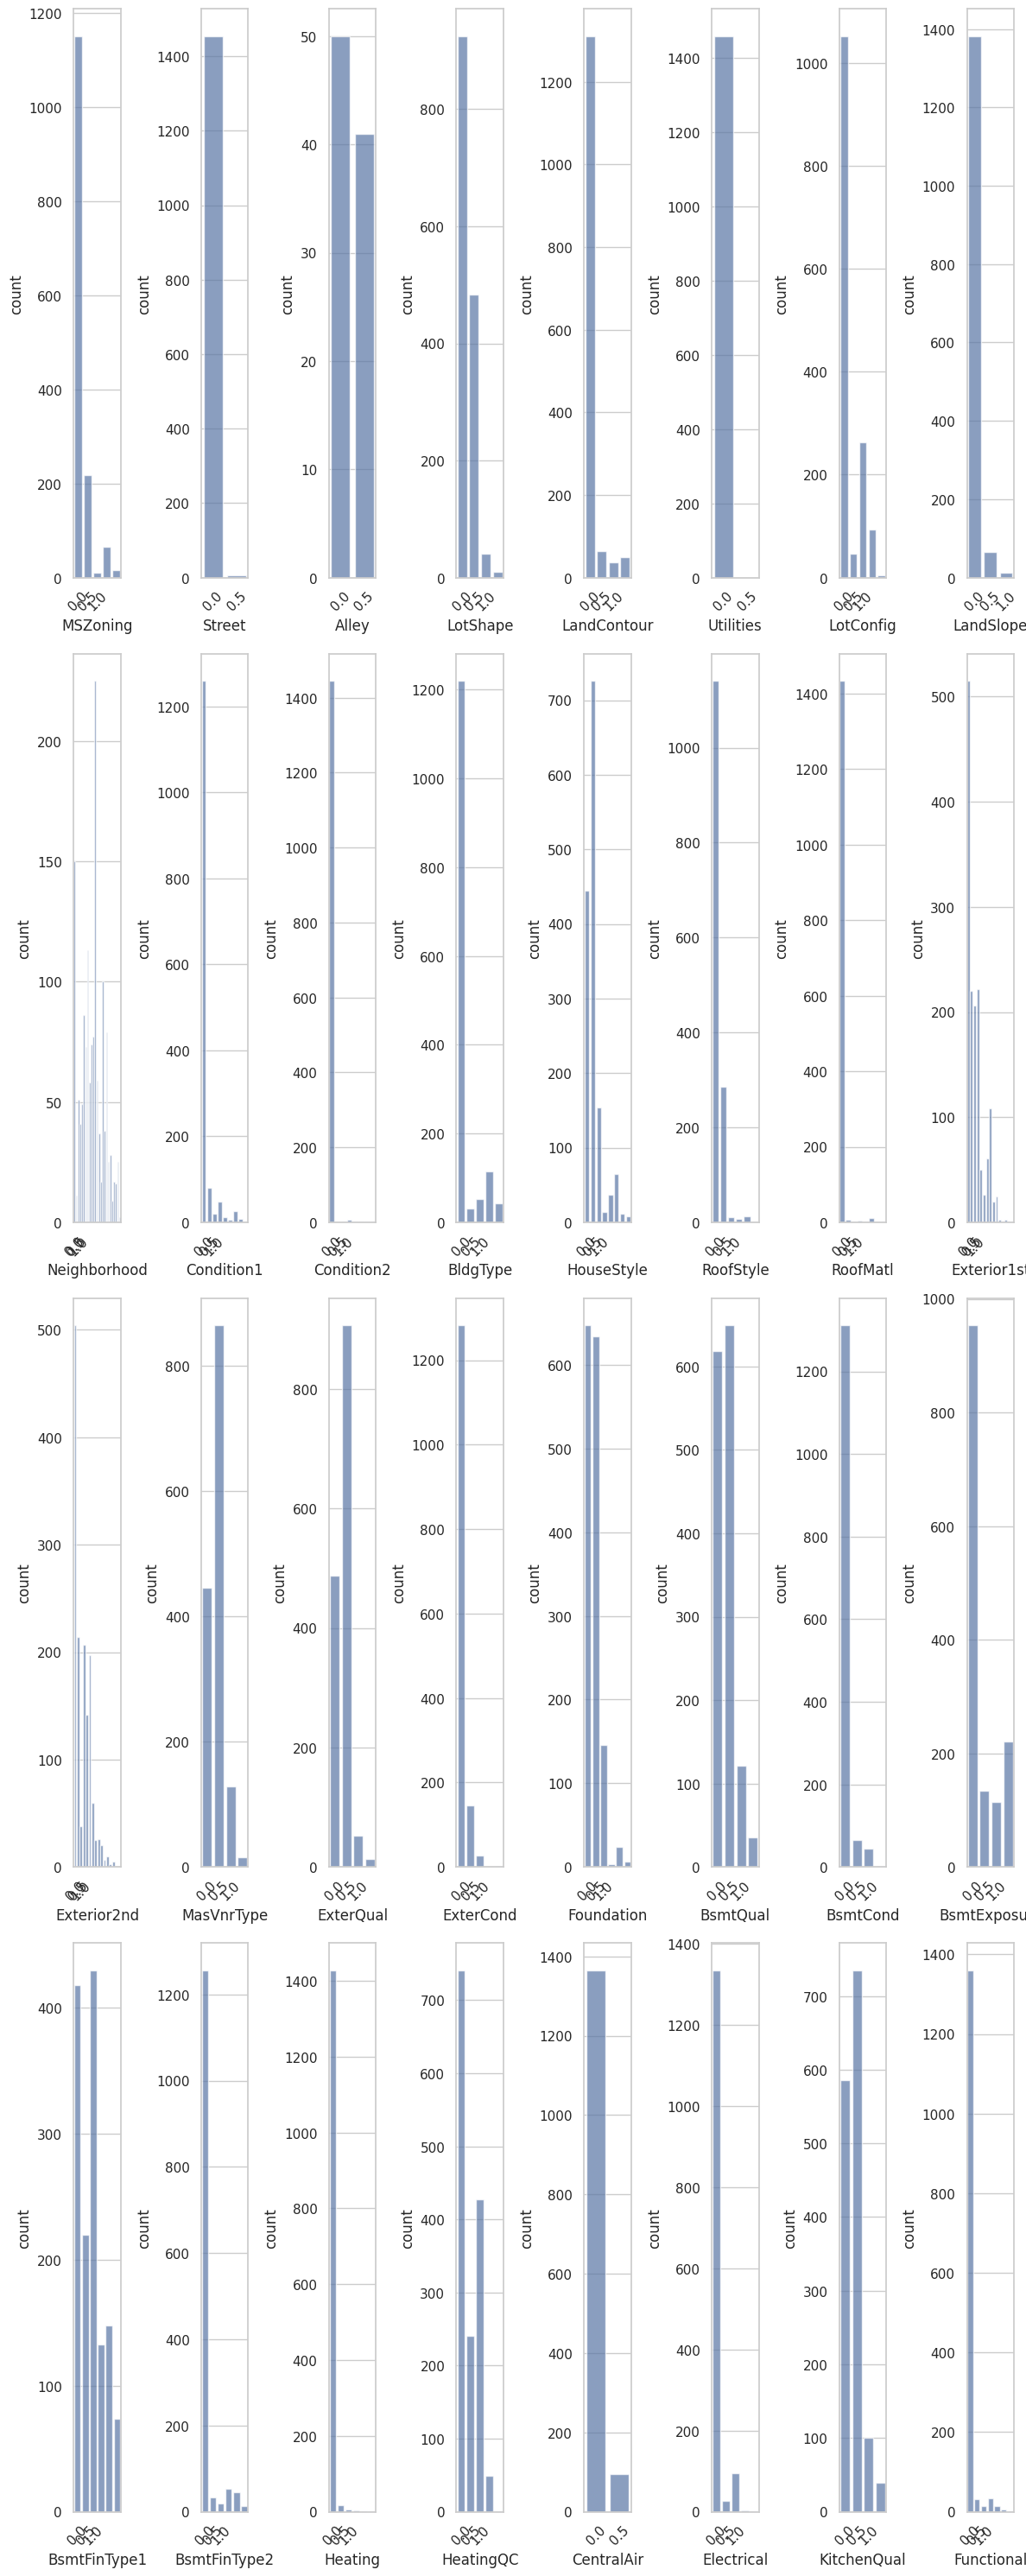

In [169]:
fig, axes = plt.subplots(
    round(len(df_train_categ.columns) / 10), 8, figsize=(12, 30)
)

for i, ax in enumerate(fig.axes):
  if i < len(df_train_categ.columns) - 1:
    ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
    sns.countplot(
        x=df_train_categ.columns[i],
        alpha=0.7,
        data=df_train_categ,
        ax=ax
    )
fig.tight_layout()

In [170]:
df_train_categ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 44 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   Alley          91 non-null     object
 3   LotShape       1460 non-null   object
 4   LandContour    1460 non-null   object
 5   Utilities      1460 non-null   object
 6   LotConfig      1460 non-null   object
 7   LandSlope      1460 non-null   object
 8   Neighborhood   1460 non-null   object
 9   Condition1     1460 non-null   object
 10  Condition2     1460 non-null   object
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   object
 13  RoofStyle      1460 non-null   object
 14  RoofMatl       1460 non-null   object
 15  Exterior1st    1460 non-null   object
 16  Exterior2nd    1460 non-null   object
 17  MasVnrType     1452 non-null   object
 18  ExterQual      1460 non-null

In [171]:
columns_to_drop = [
    'Street', 'Alley', 'LandContour',
    'Utilities', 'LandSlope', 'Condition2',
    'RoofMatl', 'CentralAir', 'BsmtFinType2',
    'Heating', 'Functional', 'GarageQual',
    'GarageCond', 'ExterCond', 'MiscFeature',
    'PavedDrive', 'SaleType'
]

In [172]:
df_train_categ.drop(columns_to_drop, axis=1, inplace=True)
df_test_categ.drop(columns_to_drop, axis=1, inplace=True)

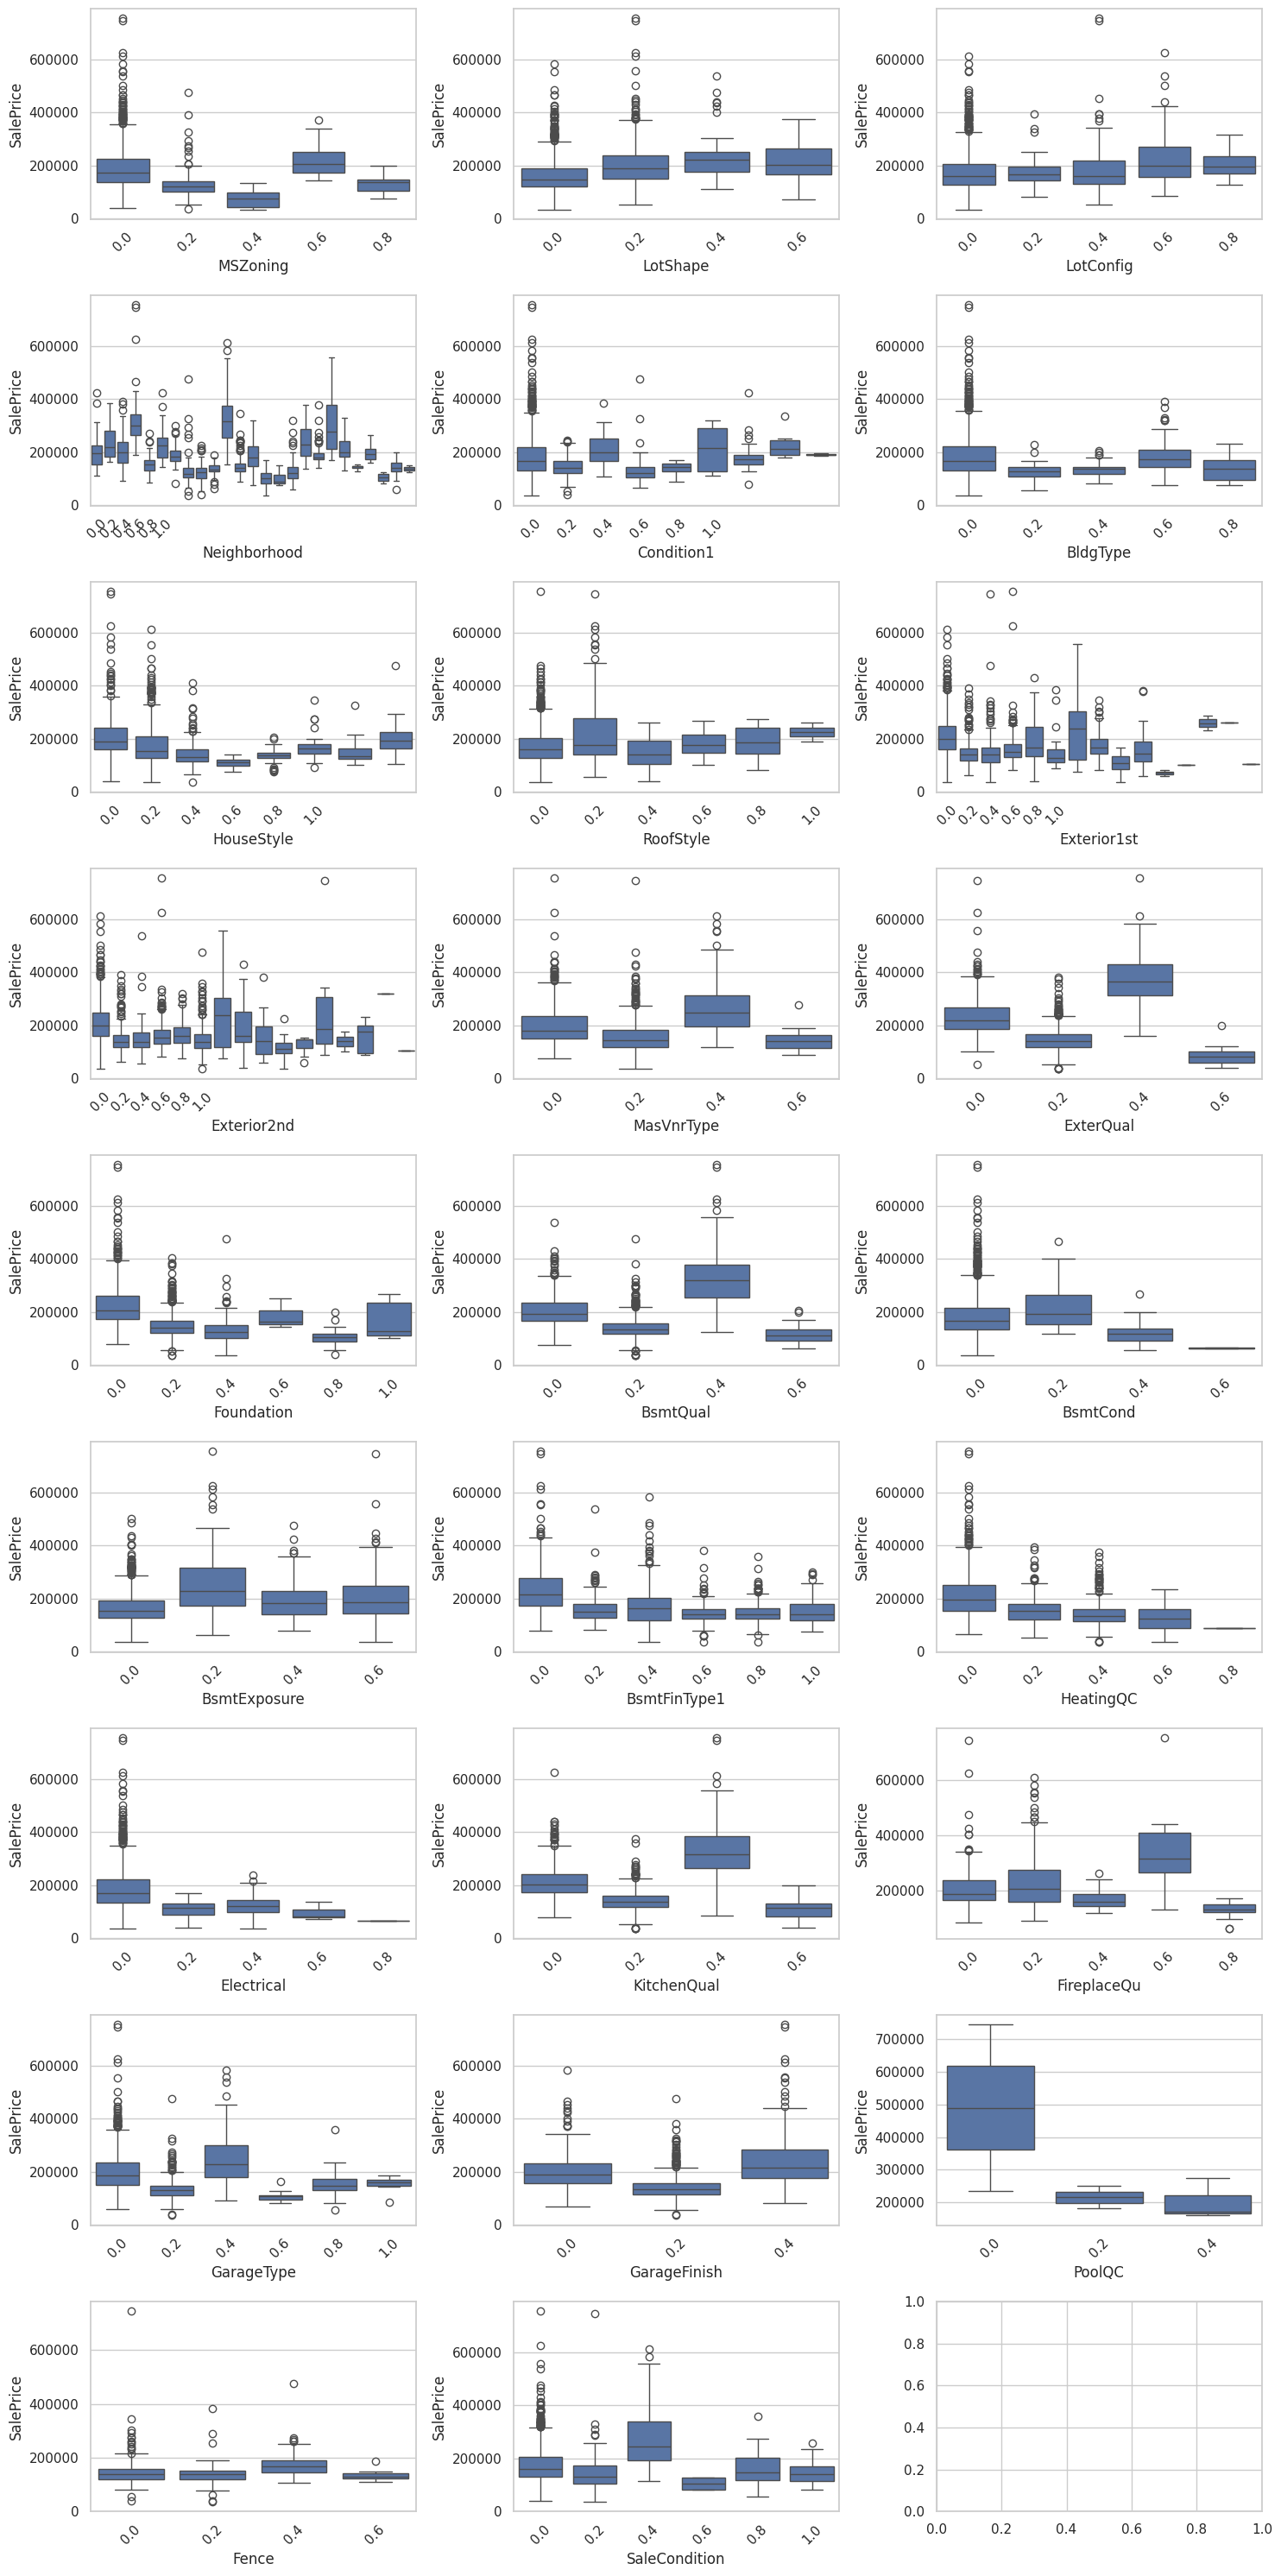

In [173]:
fig, axes = plt.subplots(
    round(len(df_train_categ.columns) / 3), 3, figsize=(15, 30))

for i, ax in enumerate(fig.axes):
  if i < len(df_train_categ.columns) - 1:
    ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
    sns.boxplot(
        x=df_train_categ.columns[i],
        y='SalePrice',
        data=df_train_categ,
        ax=ax
    )
fig.tight_layout()

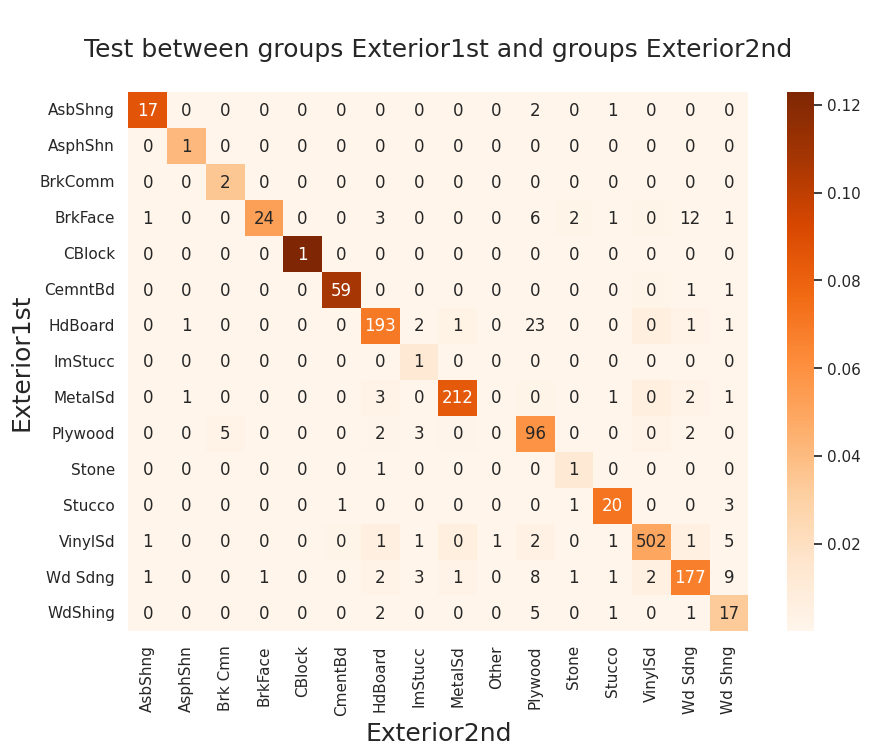

P-Value of the ChiSq Test between Exterior1st and Exterior2nd is : , 0.0



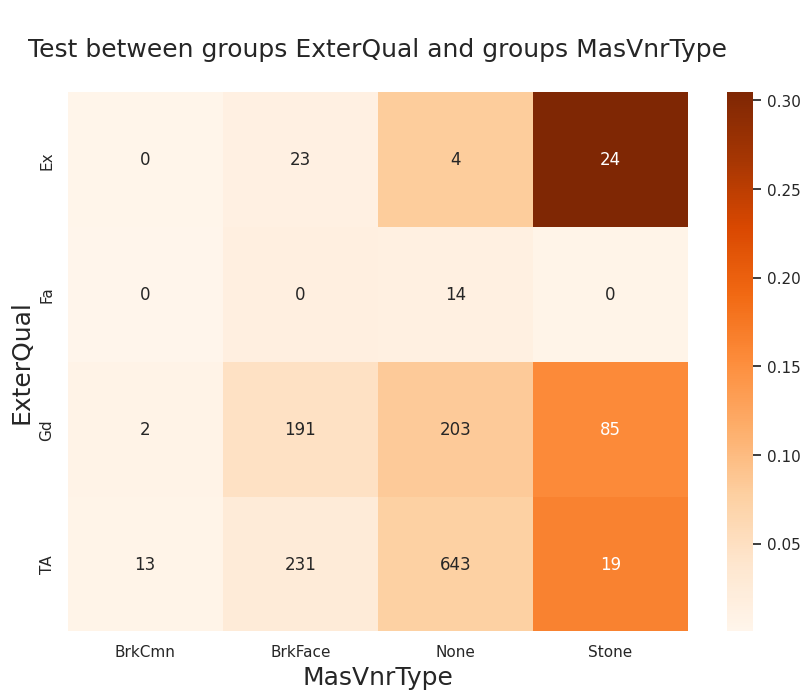

P-Value of the ChiSq Test between ExterQual and MasVnrType is : , 1.0187554679218715e-54



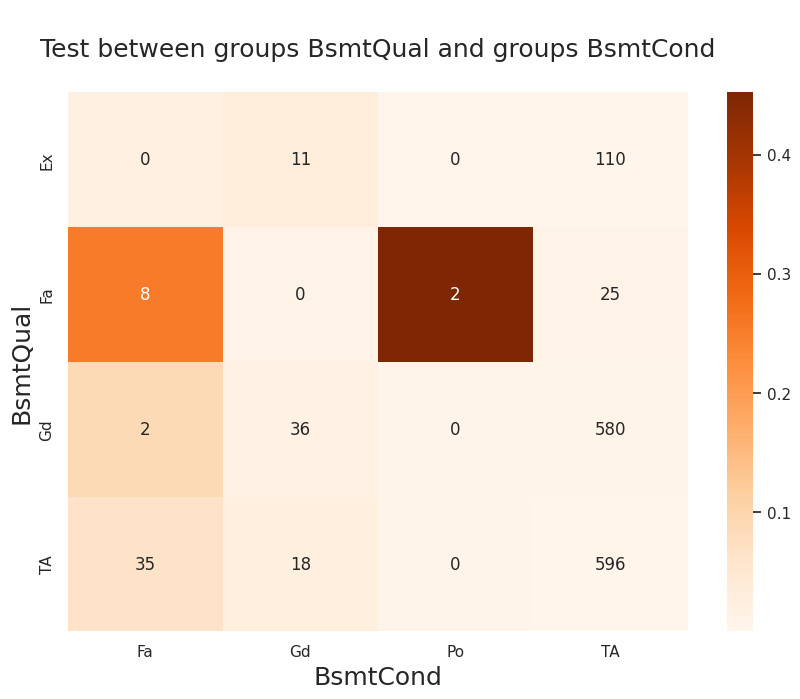

P-Value of the ChiSq Test between BsmtQual and BsmtCond is : , 1.9371809126533347e-31



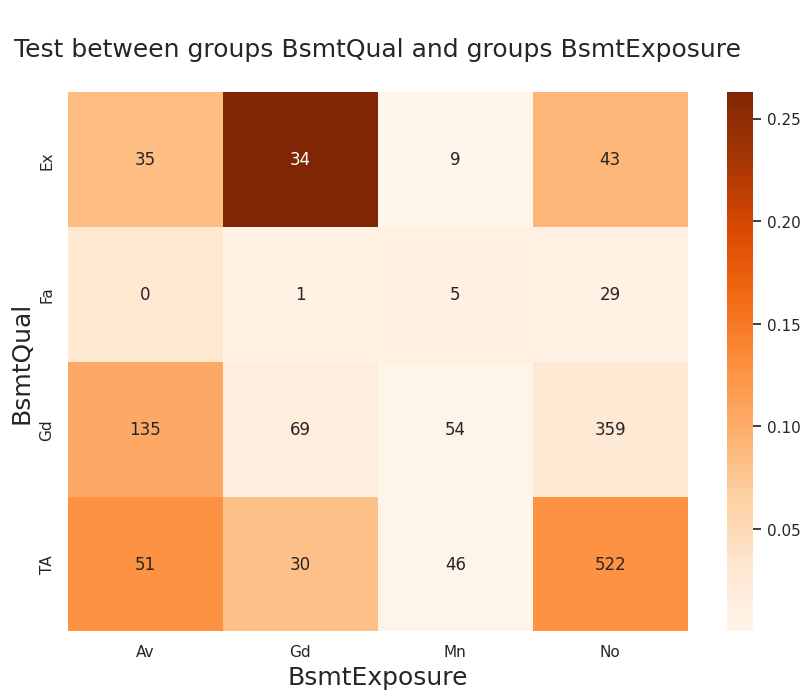

P-Value of the ChiSq Test between BsmtQual and BsmtExposure is : , 3.879215036512606e-32



In [174]:
# Plot contingency table

sns.set(rc={'figure.figsize': (10, 7)})

X = ['Exterior1st', 'ExterQual', 'BsmtQual', 'BsmtQual', 'BsmtQual']
Y = ['Exterior2nd', 'MasVnrType', 'BsmtCond', 'BsmtExposure']

for i, j in zip(X, Y):

  # Contingency table
  cont = df_train_categ[[i, j]].pivot_table(
      index=i,
      columns=j,
      aggfunc=len,
      margins=True,
      margins_name='Total'
  )
  tx = cont.loc[:, ['Total']]
  ty = cont.loc[['Total'], :]
  n = len(df_train_categ)
  indep = tx.dot(ty) / n
  c = cont.fillna(0)
  measure = (c - indep) ** 2 / indep
  xi_n = measure.sum().sum()
  table = measure / xi_n

  # Plot contingency table
  p = sns.heatmap(
      table.iloc[:-1, :-1],
      annot=c.iloc[:-1, :-1],
      fmt='.0f',
      cmap='Oranges'
  )
  p.set_xlabel(j, fontsize=18)
  p.set_ylabel(i, fontsize=18)
  p.set_title(f"\nTest between groups {i} and groups {j}\n", size=18)
  plt.show()

  # Performa Chi-sq test
  CrosstabResult = pd.crosstab(
      index=df_train_categ[i],
      columns=df_train_categ[j],
  )
  ChiSqResult = chi2_contingency(CrosstabResult)
  print(f"P-Value of the ChiSq Test between {i} and {j} is : , {ChiSqResult[1]}\n")

In [175]:
df_train_categ.drop(Y, axis=1, inplace=True)
df_test_categ.drop(Y, axis=1, inplace=True)

## Missing data of Categorical features

Text(0, 0.5, 'Column Name\n')

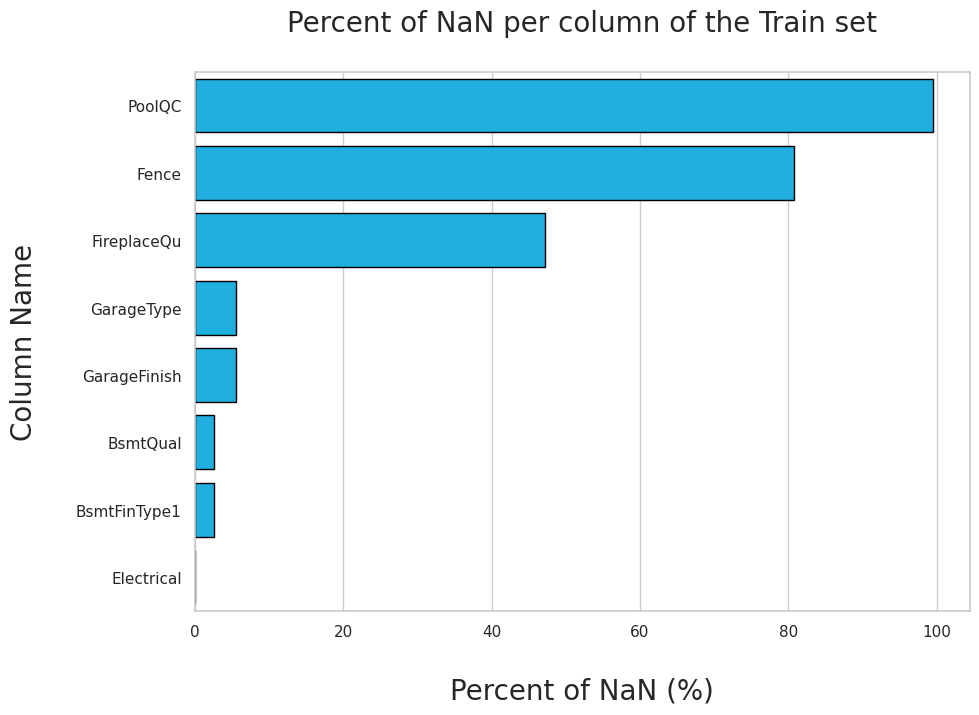

In [176]:
# Check the NaN of the test set by ploting percent of missing values per columns
column_with_nan = df_train_categ.columns[df_train_categ.isna().any()]
column_name = []
percent_nan = []

for i in column_with_nan:
  column_name.append(i)
  percent_nan.append(
      round(df_train_categ[i].isna().sum() * 100 / len(df_train_categ), 2)
  )
tab = pd.DataFrame(column_name, columns=['Column'])
tab['Percent_NaN'] = percent_nan
tab.sort_values(by=['Percent_NaN'], ascending=False, inplace=True)

sns.set(rc={'figure.figsize': (10, 7)})
sns.set_style('whitegrid')

p = sns.barplot(x='Percent_NaN',
                 y='Column',
                 data=tab,
                 edgecolor='black',
                 color='deepskyblue')
p.set_title('Percent of NaN per column of the Train set\n', fontsize=20)
p.set_xlabel('\nPercent of NaN (%)', fontsize=20)
p.set_ylabel('Column Name\n', fontsize=20)

In [177]:
tab

Column  Percent_NaN
6        PoolQC        99.52
7         Fence        80.75
3   FireplaceQu        47.26
4    GarageType         5.55
5  GarageFinish         5.55
0      BsmtQual         2.53
1  BsmtFinType1         2.53
2    Electrical         0.07

**TRAIN SET**

In [178]:
# Drop the features where the percentage of NaN is higher than 5%
df_train_categ.drop(
    ['PoolQC', 'Fence', 'FireplaceQu', 'GarageType', 'GarageFinish'],
    axis=1,
    inplace=True
)

In [179]:
categ_fill_null = {
    'BsmtQual' : df_train_categ['BsmtQual'].mode().iloc[0],
    'BsmtFinType1' : df_train_categ['BsmtFinType1'].mode().iloc[0],
    'Electrical' : df_train_categ['Electrical'].mode().iloc[0]
}
df_train_categ = df_train_categ.fillna(value=categ_fill_null)

In [180]:
df_train_categ['BsmtQual'].mode()

0    TA
Name: BsmtQual, dtype: object

In [181]:
df_train_categ['BsmtQual'].mode().iloc[0]

'TA'

**KENAPA ILOC[0]? karna kita mau ambil value nya**

**TEST SET**

In [182]:
df_test_categ.drop(
    ['PoolQC', 'Fence', 'FireplaceQu', 'GarageType', 'GarageFinish'],
    axis=1,
    inplace=True
)

In [183]:
categ_fill_null = {
    'BsmtQual' : df_train_categ['BsmtQual'].mode().iloc[0],
    'BsmtFinType1' : df_train_categ['BsmtFinType1'].mode().iloc[0],
    'Electrical' : df_train_categ['Electrical'].mode().iloc[0]
}
df_train_categ = df_train_categ.fillna(value=categ_fill_null)

Text(0, 0.5, 'Column Name\n')

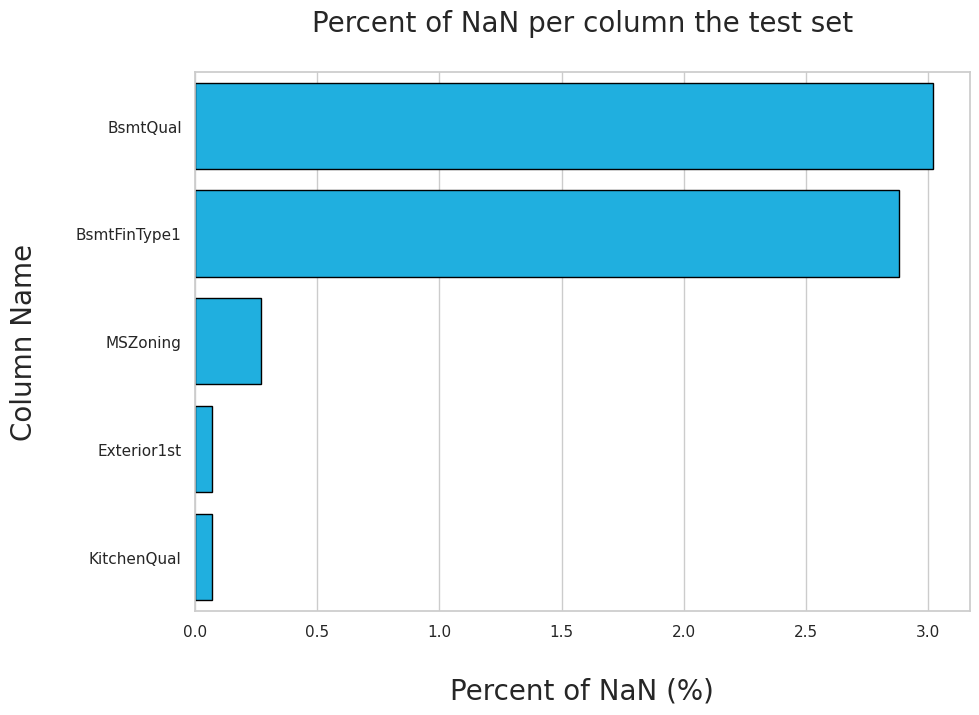

In [184]:
column_with_nan = df_test_categ.columns[df_test_categ.isna().any()]
column_name = []
percent_nan = []

for i in column_with_nan:
  column_name.append(i)
  percent_nan.append(
      round(df_test_categ[i].isna().sum() * 100 / len(df_test_categ), 2)
  )

tab = pd.DataFrame(column_name, columns=['Column'])
tab['Percent_NaN'] = percent_nan
tab.sort_values(by=['Percent_NaN'], ascending=False, inplace=True)


sns.set(rc={'figure.figsize' : (10, 7)})
sns.set_style('whitegrid')

p = sns.barplot(
    x='Percent_NaN',
    y='Column',
    data=tab,
    edgecolor='black',
    color='deepskyblue'
)

p.set_title('Percent of NaN per column the test set\n', fontsize=20)
p.set_xlabel('\nPercent of NaN (%)', fontsize=20)
p.set_ylabel('Column Name\n', fontsize=20)

In [185]:
tab

Column  Percent_NaN
2      BsmtQual         3.02
3  BsmtFinType1         2.88
0      MSZoning         0.27
1   Exterior1st         0.07
4   KitchenQual         0.07

In [186]:
categ_fill_na = {
    'BsmtQual' : df_train_categ['BsmtQual'].mode().iloc[0],
    'BsmtFinType1' : df_train_categ['BsmtFinType1'].mode().iloc[0],
    'MSZoning' : df_train_categ['MSZoning'].mode().iloc[0],
    'Exterior1st' : df_train_categ['Exterior1st'].mode().iloc[0],
    'KitchenQual' : df_train_categ['KitchenQual'].mode().iloc[0]
}

In [187]:
df_test_categ = df_test_categ.fillna(value=categ_fill_na)

In [188]:
df_train_categ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   LotShape       1460 non-null   object
 2   LotConfig      1460 non-null   object
 3   Neighborhood   1460 non-null   object
 4   Condition1     1460 non-null   object
 5   BldgType       1460 non-null   object
 6   HouseStyle     1460 non-null   object
 7   RoofStyle      1460 non-null   object
 8   Exterior1st    1460 non-null   object
 9   ExterQual      1460 non-null   object
 10  Foundation     1460 non-null   object
 11  BsmtQual       1460 non-null   object
 12  BsmtFinType1   1460 non-null   object
 13  HeatingQC      1460 non-null   object
 14  Electrical     1460 non-null   object
 15  KitchenQual    1460 non-null   object
 16  SaleCondition  1460 non-null   object
 17  SalePrice      1460 non-null   int64 
dtypes: int64(1), object(17)
memo

## Transform Categorical Feature into Binary (get_dummy)

**TRAIN SET**

In [189]:
for i in df_train_categ.columns.tolist()[:-1]:
  df_dummies = pd.get_dummies(df_train_categ[i], prefix=i)
  df_train_categ = df_train_categ.join(df_dummies)

df_train_binary = df_train_categ.iloc[:, 18:]
df_train_binary.head()

MSZoning_C (all)  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
0                 0            0            0            1            0   
1                 0            0            0            1            0   
2                 0            0            0            1            0   
3                 0            0            0            1            0   
4                 0            0            0            1            0   

   LotShape_IR1  LotShape_IR2  LotShape_IR3  LotShape_Reg  LotConfig_Corner  \
0             0             0             0             1                 0   
1             0             0             0             1                 0   
2             1             0             0             0                 0   
3             1             0             0             0                 1   
4             1             0             0             0                 0   

   ...  KitchenQual_Ex  KitchenQual_Fa  KitchenQual_Gd  KitchenQual_TA  \
0  ...               0               0               1               0   
1  ...               0               0               0               1   
2  ...               0               0               1               0   
3  ...               0               0               1               0   
4  ...               0               0               1               0   

   SaleCondition_Abnorml  SaleCondition_AdjLand  SaleCondition_Alloca  \
0                      0                      0                     0   
1                      0                      0                     0   
2                      0                      0                     0   
3                      1                      0                     0   
4                      0                      0                     0   

   SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
0                     0                     1                      0  
1                     0                     1                      0  
2                     0                     1                      0  
3                     0                     0                      0  
4                     0                     1                      0  

[5 rows x 122 columns]

In [190]:
df_train_binary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 122 entries, MSZoning_C (all) to SaleCondition_Partial
dtypes: uint8(122)
memory usage: 174.1 KB


**TEST SET**

In [191]:
df_test_categ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1459 non-null   object
 1   LotShape       1459 non-null   object
 2   LotConfig      1459 non-null   object
 3   Neighborhood   1459 non-null   object
 4   Condition1     1459 non-null   object
 5   BldgType       1459 non-null   object
 6   HouseStyle     1459 non-null   object
 7   RoofStyle      1459 non-null   object
 8   Exterior1st    1459 non-null   object
 9   ExterQual      1459 non-null   object
 10  Foundation     1459 non-null   object
 11  BsmtQual       1459 non-null   object
 12  BsmtFinType1   1459 non-null   object
 13  HeatingQC      1459 non-null   object
 14  Electrical     1459 non-null   object
 15  KitchenQual    1459 non-null   object
 16  SaleCondition  1459 non-null   object
dtypes: object(17)
memory usage: 193.9+ KB


In [192]:
for i in df_test_categ.columns.tolist():
  df_dummies = pd.get_dummies(df_test_categ[i], prefix=i)
  df_test_categ = df_test_categ.join(df_dummies)

df_test_binary = df_test_categ.iloc[:, 17:]
df_test_binary.head()

MSZoning_C (all)  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
0                 0            0            1            0            0   
1                 0            0            0            1            0   
2                 0            0            0            1            0   
3                 0            0            0            1            0   
4                 0            0            0            1            0   

   LotShape_IR1  LotShape_IR2  LotShape_IR3  LotShape_Reg  LotConfig_Corner  \
0             0             0             0             1                 0   
1             1             0             0             0                 1   
2             1             0             0             0                 0   
3             1             0             0             0                 0   
4             1             0             0             0                 0   

   ...  KitchenQual_Ex  KitchenQual_Fa  KitchenQual_Gd  KitchenQual_TA  \
0  ...               0               0               0               1   
1  ...               0               0               1               0   
2  ...               0               0               0               1   
3  ...               0               0               1               0   
4  ...               0               0               1               0   

   SaleCondition_Abnorml  SaleCondition_AdjLand  SaleCondition_Alloca  \
0                      0                      0                     0   
1                      0                      0                     0   
2                      0                      0                     0   
3                      0                      0                     0   
4                      0                      0                     0   

   SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
0                     0                     1                      0  
1                     0                     1                      0  
2                     0                     1                      0  
3                     0                     1                      0  
4                     0                     1                      0  

[5 rows x 118 columns]

In [193]:
# Check every columns in df_train_binary and df_test_binary
dif_1 = [x for x in df_train_binary.columns if x not in df_test_binary.columns]
print(f"Features present in df_train_binary but absent in df_test_binary : {dif_1}\n")

dif_2 = [x for x in df_test_binary.columns if x not in df_test_binary.columns]
print(f"Features present in df_test_binary but absent in df_train_binary : {dif_2}")

Features present in df_train_binary but absent in df_test_binary : ['HouseStyle_2.5Fin', 'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Electrical_Mix']

Features present in df_test_binary but absent in df_train_binary : []


In [194]:
# Let's drop these columns from df_train_binary
df_train_binary.drop(dif_1, axis=1, inplace=True)

In [195]:
dif_1 = [x for x in df_train_binary.columns if x not in df_test_binary.columns]
print(f"Features present in df_train_binary but absent in df_test_binary : {dif_1}\n")

dif_2 = [x for x in df_test_binary.columns if x not in df_test_binary.columns]
print(f"Features present in df_test_binary but absent in df_train_binary : {dif_2}")

Features present in df_train_binary but absent in df_test_binary : []

Features present in df_test_binary but absent in df_train_binary : []


# Merge Numerical and Binary Features into one Dataset

In [196]:
# Train Set
df_train_new = df_train_imputed.join(df_train_binary)
print(f"Train Set : {df_train_new.shape}")

# Test Set
df_test_new = df_test_imputed.join(df_test_binary)
print(f"Test Set : {df_test_new.shape}")

Train Set : (1460, 135)
Test Set : (1459, 134)


<Axes: xlabel='WoodDeckSF'>

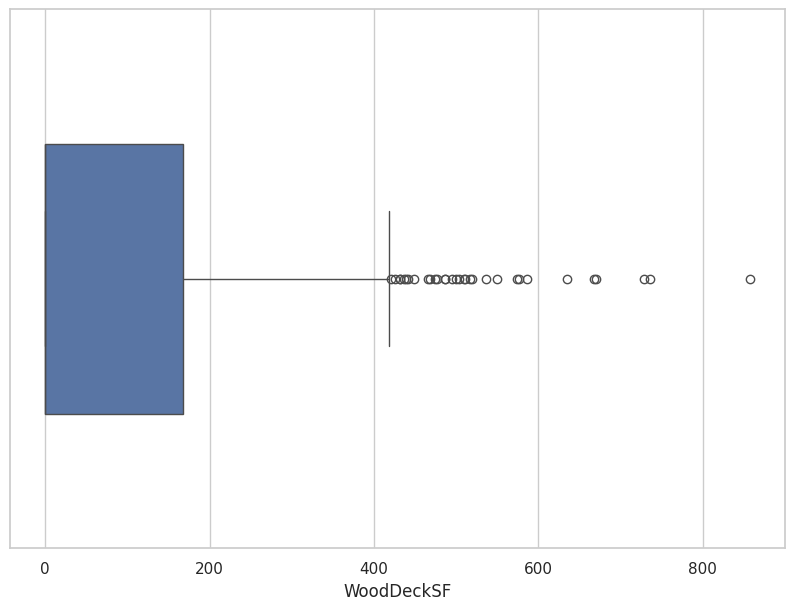

In [197]:
sns.boxplot(x='WoodDeckSF', data=df_train_num, orient='h', width=0.5)

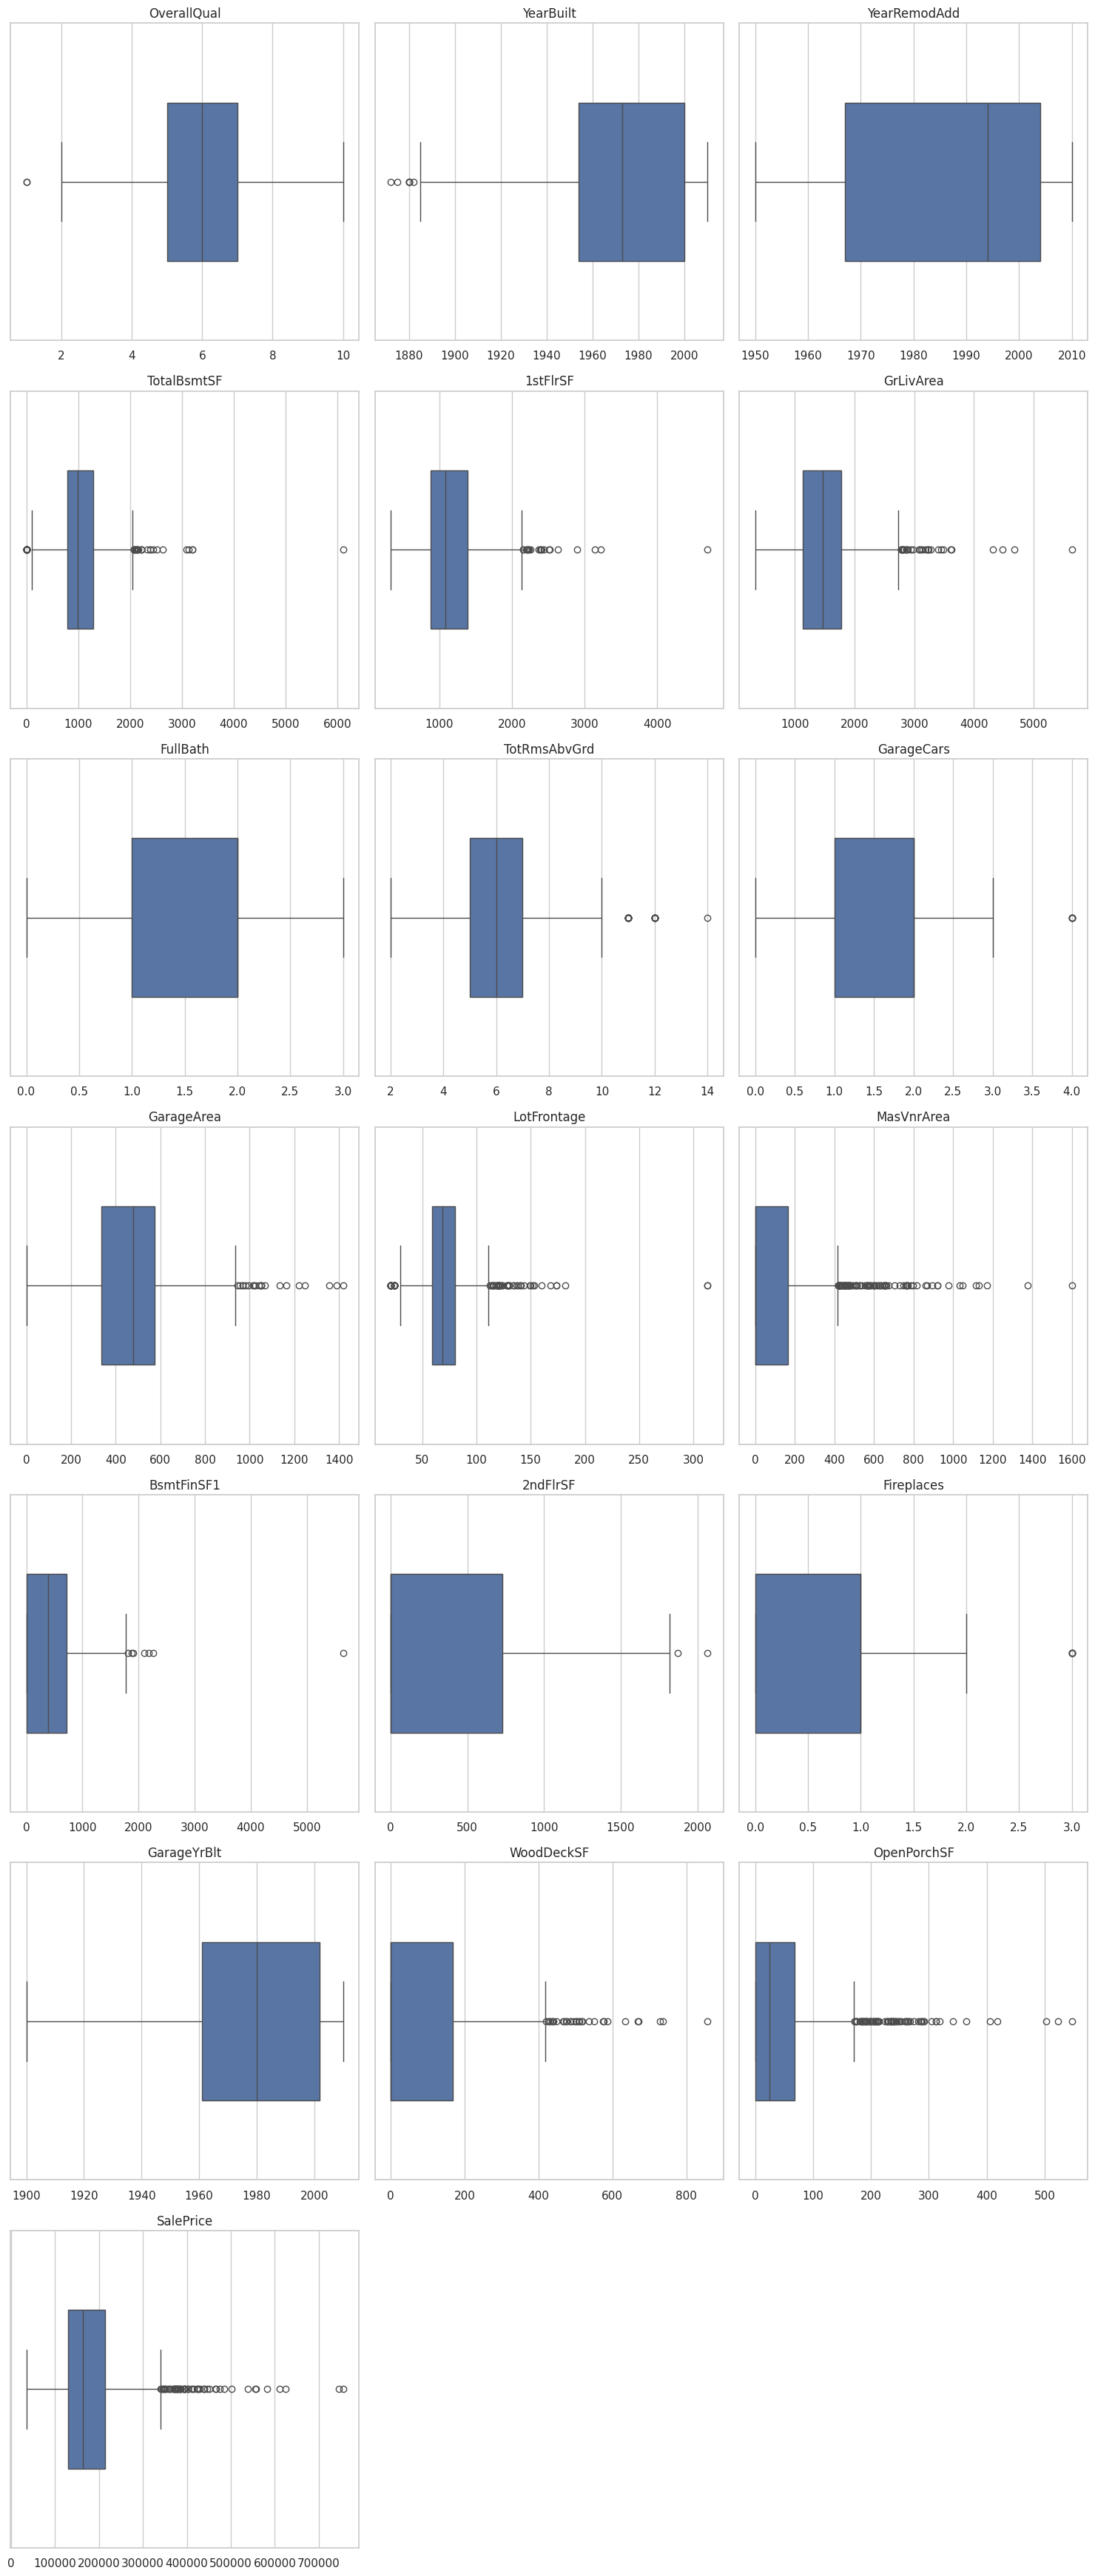

In [198]:
num_cols = len(df_train_num.columns)
num_rows = num_cols // 3 + (num_cols % 3 > 0)

# Mengatur ukuran plot
plt.figure(figsize=(15, 5 * num_rows))

# Melakukan iterasi melalui setiap kolom dan membuat boxplot terpisah untuk setiap kolom
for i, column in enumerate(df_train_num.columns):
    plt.subplot(num_rows, 3, i + 1)  # Mengatur subplot
    sns.boxplot(x=df_train_num[column], width=0.5)  # Membuat boxplot untuk kolom saat ini
    plt.title(column)  # Menambahkan judul plot
    plt.xlabel('')  # Menghapus label sumbu x untuk kejelasan
    plt.ylabel('')  # Menghapus label sumbu y untuk kejelasan

plt.tight_layout()  # Menyesuaikan layout plot agar lebih rapi
plt.show()  # Menampilkan plot

## Drop Outliers from the Train Set

In [199]:
df_train_new.drop(['WoodDeckSF', 'OpenPorchSF'], axis=1, inplace=True)
df_test_new.drop(['WoodDeckSF', 'OpenPorchSF'], axis=1, inplace=True)
# Outliers in 'GrLivArea'
outliers_1 = df_train_new[(df_train_new["GrLivArea"] > 4000) & (df_train_new["SalePrice"] <= 200000)].index.tolist()

# Outliers in 'TotalBmstSF'
outliers_2 = df_train_new[(df_train_new["TotalBsmtSF"] > 3000) & (df_train_new["SalePrice"] <= 400000)].index.tolist()

# Outliers in 'GarageArea'
outliers_3 = df_train_new[(df_train_new["GarageArea"] > 1200) & (df_train_new["SalePrice"] <= 300000)].index.tolist()

outliers = outliers_1 + outliers_2 + outliers_3
outliers = list(set(outliers))
print(outliers)

# Drop outliers
df_train_new = df_train_new.drop(df_train_new.index[outliers])

df_train_new = df_train_new.reset_index().drop("index", axis=1)

[1061, 581, 1190, 523, 332, 1298]


# Feature Engineering

In [200]:
def floor_occupation(x):
  if x["GrLivArea"] == 0:
    return 0
  else:
    return x["1stFlrSF"] * 100 / x["GrLivArea"]

df_train_new["1stFlrPercent"] = df_train_new.apply(
    lambda x: floor_occupation(x), axis=1
)

df_test_new["1stFlrPercent"] = df_test_new.apply(
    lambda x: floor_occupation(x), axis=1
)

df_train_new.drop(['1stFlrSF', '2ndFlrSF'], axis=1, inplace=True)
df_test_new.drop(['1stFlrSF', '2ndFlrSF'], axis=1, inplace=True)

In [201]:
def bsmt_finish(x):
  if x["TotalBsmtSF"] == 0:
    return 0
  else:
    return x["BsmtFinSF1"] * 100 / x["TotalBsmtSF"]

df_train_new["BsmtFinPercent"] = df_train_new.apply(
    lambda x: bsmt_finish(x), axis=1
)
df_test_new["BsmtFinPercent"] = df_test_new.apply(
    lambda x: bsmt_finish(x), axis=1
)

df_train_new.drop(["BsmtFinSF1"], axis=1, inplace=True)
df_test_new.drop(["BsmtFinSF1"], axis=1, inplace=True)

In [202]:
df_train_new["AgeSinceConst"] = df_train_new["YearBuilt"].max() - df_train_new["YearBuilt"]
df_test_new["AgeSinceConst"] = df_train_new["YearBuilt"].max() - df_test_new["YearBuilt"]

df_train_new.drop(["YearBuilt"], axis=1, inplace=True)
df_test_new.drop(["YearBuilt"], axis=1, inplace=True)

In [203]:
df_train_new["AgeSinceRemod"] = df_train_new["YearRemodAdd"].max() - df_train_new["YearRemodAdd"]
df_test_new["AgeSinceRemod"] = df_train_new["YearRemodAdd"].max() - df_test_new["YearRemodAdd"]

df_train_new.drop(["YearRemodAdd"], axis=1, inplace=True)
df_test_new.drop(["YearRemodAdd"], axis=1, inplace=True)

In [204]:
continuous_features = [
    "OverallQual", "TotalBsmtSF", "GrLivArea",
    "FullBath", "TotRmsAbvGrd", "GarageCars", "GarageArea",
    "MasVnrArea", "Fireplaces", "1stFlrPercent",
    "BsmtFinPercent", "AgeSinceConst", "AgeSinceRemod"
]
df_skew_verify = df_train_new.loc[:, continuous_features]

skew_ft = []
for i in continuous_features:
  skew_ft.append(abs(df_skew_verify[i].skew()))
df_skewed = pd.DataFrame({
    "Columns" : continuous_features,
    "Abs_skew" : skew_ft
})
sk_features = df_skewed[df_skewed["Abs_skew"] > 0.5]["Columns"].tolist()
# Log Transformation
for i in sk_features:
  df_train_new[i] = np.log((df_train_new[i])+1)
  df_test_new[i] = np.log((df_test_new[i])+1)

# Preparing Data for Modeling

## Target Variable "SalePrice"

Text(0, 0.5, 'After')

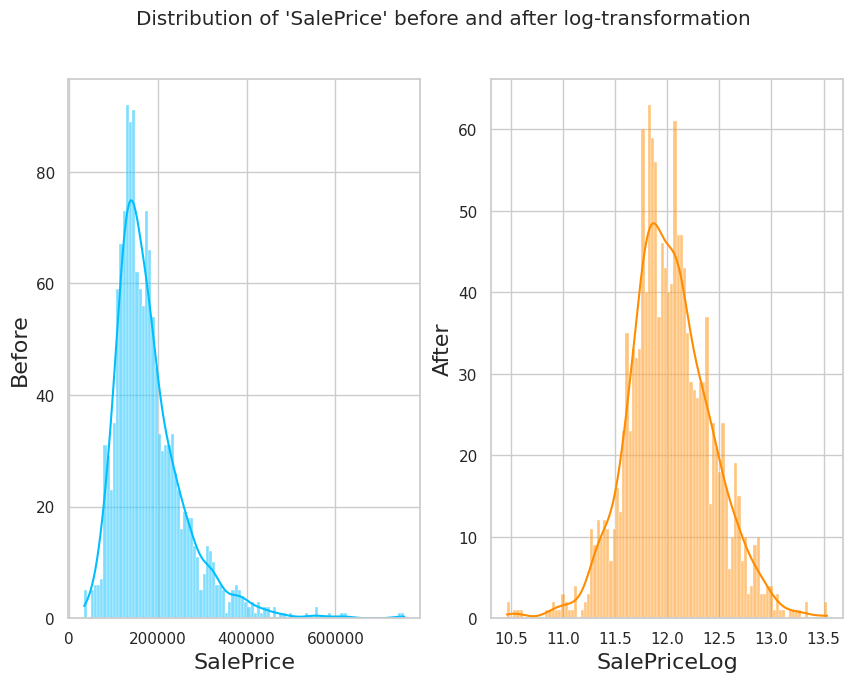

In [205]:
df_train_new["SalePriceLog"] = np.log(df_train_new.SalePrice)

fig, axes = plt.subplots(1, 2)
fig.suptitle("Distribution of 'SalePrice' before and after log-transformation")

# Before log transformation
p = sns.histplot(
    ax=axes[0],
    x=df_train_new["SalePrice"],
    kde=True,
    bins=100,
    color="deepskyblue"
)
p.set_xlabel("SalePrice", fontsize=16)
p.set_ylabel("Before", fontsize=16)

# After log Transformation
q = sns.histplot(
    ax=axes[1],
    x=df_train_new["SalePriceLog"],
    kde=True,
    bins=100,
    color="darkorange"
)
q.set_xlabel("SalePriceLog", fontsize=16)
q.set_ylabel("After", fontsize=16)

In [206]:
df_train_new.drop("SalePrice", axis=1, inplace=True)

In [207]:
X = df_train_new[[i for i in list(df_train_new.columns) if i != "SalePriceLog"]]
print(X.shape)

y = df_train_new.loc[:, "SalePriceLog"]
print(y.shape)

(1454, 131)
(1454,)


## Split dataset into train and test set and standarization

In [208]:
bins = np.linspace(0, len(y), 150)
y_binned = np.digitize(y, bins)

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y_binned,
    shuffle=True
)

print(f"X_train :{X_train.shape}\ny_train :{y_train.shape}")
print(f"X_train :{X_test.shape}\ny_train :{y_test.shape}")

X_train :(1163, 131)
y_train :(1163,)
X_train :(291, 131)
y_train :(291,)


In [209]:
len(y)

1454

In [210]:
# Standarization the data
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train = std_scale.transform(X_train)
X_test = std_scale.transform(X_test)

# Do the same to df_test_new
df_test_new = std_scale.transform(df_test_new)

# The output of standarization is vector, Lets turn it into a table
# Convert X, y and test data into DataFrame
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)
df_test_new = pd.DataFrame(df_test_new, columns=X.columns)

y_train = pd.DataFrame(y_train)
y_train = y_train.reset_index().drop("index", axis=1)

y_test = pd.DataFrame(y_test)
y_test = y_test.reset_index().drop("index", axis=1)

## Backward Stepwise Regression

In [211]:
Selected_features = []
def backward_regression(X, y, initial_list=[], threshold_in=0.01, threshold_out=0.05, verbose=True):
  included = list(X.columns)
  while True:
    changed = False
    model = sm.OLS(y , sm.add_constant(pd.DataFrame(X[included]))).fit()
    # use all coefs except intercept
    pvalues = model.pvalues.iloc[1:]
    worst_pval = pvalues.max() # null if pvalues is empty
    if worst_pval > threshold_out:
      changed = True
      worst_feature = pvalues.idxmax()
      included.remove(worst_feature)
      if verbose:
        print(f"worst_feature : {worst_feature}, {worst_pval}")
    if not changed:
      break
  Selected_features.append(included)
  print(f"\nSelected Features:\n{Selected_features[0]}")

In [212]:
backward_regression(X_train, y_train)

worst_feature : Condition1_RRAn, 0.9958798688685365
worst_feature : Exterior1st_AsphShn, 0.9737019741989964
worst_feature : Exterior1st_Wd Sdng, 0.9739050640221986
worst_feature : 1stFlrPercent, 0.9699693264074585
worst_feature : Condition1_PosA, 0.967891319915444
worst_feature : HouseStyle_SLvl, 0.9638311094378349
worst_feature : Neighborhood_SawyerW, 0.9515576407786497
worst_feature : Neighborhood_CollgCr, 0.9947579053351955
worst_feature : Foundation_Slab, 0.9207291463763552
worst_feature : Foundation_PConc, 0.979247710887442
worst_feature : Electrical_SBrkr, 0.9057628922335299
worst_feature : RoofStyle_Hip, 0.8953304973020423
worst_feature : HeatingQC_Po, 0.8939265112191384
worst_feature : HeatingQC_Ex, 0.9604560748717503
worst_feature : Exterior1st_CBlock, 0.8886329070281478
worst_feature : LotShape_IR1, 0.8842682428846911
worst_feature : Neighborhood_Blmngtn, 0.8783076929739996
worst_feature : Neighborhood_NAmes, 0.8758113221130062
worst_feature : MSZoning_RH, 0.8652543568941768


In [213]:
Selected_features

[['OverallQual',
  'TotalBsmtSF',
  'GrLivArea',
  'GarageCars',
  'GarageArea',
  'Fireplaces',
  'MSZoning_C (all)',
  'MSZoning_FV',
  'LotShape_IR2',
  'LotShape_IR3',
  'LotShape_Reg',
  'LotConfig_CulDSac',
  'Neighborhood_ClearCr',
  'Neighborhood_Crawfor',
  'Neighborhood_Edwards',
  'Neighborhood_IDOTRR',
  'Neighborhood_MeadowV',
  'Neighborhood_NoRidge',
  'Neighborhood_NridgHt',
  'Neighborhood_OldTown',
  'Neighborhood_StoneBr',
  'Neighborhood_Veenker',
  'Condition1_Norm',
  'Condition1_RRAe',
  'BldgType_Duplex',
  'BldgType_Twnhs',
  'BldgType_TwnhsE',
  'Exterior1st_BrkComm',
  'Exterior1st_BrkFace',
  'Exterior1st_MetalSd',
  'Exterior1st_Plywood',
  'ExterQual_Ex',
  'ExterQual_Fa',
  'Foundation_BrkTil',
  'Foundation_Wood',
  'BsmtQual_Ex',
  'BsmtQual_Fa',
  'BsmtQual_TA',
  'BsmtFinType1_ALQ',
  'BsmtFinType1_GLQ',
  'HeatingQC_Fa',
  'HeatingQC_Gd',
  'HeatingQC_TA',
  'KitchenQual_Ex',
  'SaleCondition_Abnorml',
  'SaleCondition_Family',
  'BsmtFinPercent',
  

In [214]:
# Keep the selected features only
X_train = X_train.loc[:, Selected_features[0]]
X_test = X_test.loc[:, Selected_features[0]]
df_test_new = df_test_new.loc[:, Selected_features[0]]

## Variance Inflation Factor

In [215]:
# Here i calculate VIF for each feature
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    X_train.values, i) for i in range(X_train.shape[1])]
vif["features"] = X_train.columns
vif.round(1)

VIF Factor               features
0         3.70            OverallQual
1         1.90            TotalBsmtSF
2         2.20              GrLivArea
3         5.70             GarageCars
4         5.30             GarageArea
5         1.60             Fireplaces
6         1.30       MSZoning_C (all)
7         1.30            MSZoning_FV
8         1.10           LotShape_IR2
9         1.00           LotShape_IR3
10        1.40           LotShape_Reg
11        1.20      LotConfig_CulDSac
12        1.10   Neighborhood_ClearCr
13        1.20   Neighborhood_Crawfor
14        1.20   Neighborhood_Edwards
15        1.40    Neighborhood_IDOTRR
16        1.20   Neighborhood_MeadowV
17        1.30   Neighborhood_NoRidge
18        1.70   Neighborhood_NridgHt
19        1.40   Neighborhood_OldTown
20        1.20   Neighborhood_StoneBr
21        1.10   Neighborhood_Veenker
22        1.20        Condition1_Norm
23        1.10        Condition1_RRAe
24        1.20        BldgType_Duplex
25        1.20         BldgType_Twnhs
26        1.40        BldgType_TwnhsE
27        1.10    Exterior1st_BrkComm
28        1.10    Exterior1st_BrkFace
29        1.20    Exterior1st_MetalSd
30        1.30    Exterior1st_Plywood
31        1.70           ExterQual_Ex
32        1.20           ExterQual_Fa
33        1.40      Foundation_BrkTil
34        1.00        Foundation_Wood
35        2.00            BsmtQual_Ex
36        1.40            BsmtQual_Fa
37        2.50            BsmtQual_TA
38        1.40       BsmtFinType1_ALQ
39        2.40       BsmtFinType1_GLQ
40        1.20           HeatingQC_Fa
41        1.30           HeatingQC_Gd
42        1.80           HeatingQC_TA
43        1.80         KitchenQual_Ex
44        1.10  SaleCondition_Abnorml
45        1.10   SaleCondition_Family
46        1.80         BsmtFinPercent
47        2.30          AgeSinceRemod

In [216]:
# Select features with high VIF
high_vif_list = vif[vif["VIF Factor"] > 10]["features"].tolist()

if len(high_vif_list) == 0:
  print(f"None of the features have a high multicollinearity")
else:
  print(f"List featurs wiht high multicollinearity : {high_vif_list}")

None of the features have a high multicollinearity


In [217]:
X_train.drop(high_vif_list, axis=1, inplace=True)
X_test.drop(high_vif_list, axis=1, inplace=True)
df_test_new.drop(high_vif_list, axis=1, inplace=True)

## Cook Distance

In [218]:
X_constant = sm.add_constant(X_train)
model = sm.OLS(y_train, X_constant)
lr = model.fit()

np.set_printoptions(suppress=True)

influence = lr.get_influence()

cooks = influence.cooks_distance

cook_df = pd.DataFrame({
    "Cook_Distance" : cooks[0],
    "p_value" : cooks[1]
})
cook_df.head()

Cook_Distance  p_value
0           0.00     1.00
1           0.00     1.00
2           0.00     1.00
3           0.00     1.00
4           0.00     1.00

In [219]:
cook_df.shape

(1163, 2)

In [220]:
# Remove the influential observation from x_train dan y_train
influent_observation = cook_df[cook_df["p_value"] < 0.05].index.tolist()
print(f"Influential observations dropped : {influent_observation}")

X_train = X_train.drop(X_train.index[influent_observation])
y_train = y_train.drop(X_train.index[influent_observation])

Influential observations dropped : []


In [221]:
influent_observation

[]

# Modeling

## Models and metrics selection

In [222]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [223]:
# Lets define a function for each metrics
# R2
def rsqr_score(test, pred):
  r2_ = r2_score(test, pred)
  return r2_
def rmse_score(test, pred):
  rmse_ = np.sqrt(mean_squared_error(test, pred))
  return rmse_
def print_score(test, pred):
  print(f"- Regressor : {regr.__class__.__name__}")
  print(f"R² : {rsqr_score(test, pred)}")
  print(f"RMSE : {rmse_score(test, pred)}\n")

In [224]:
# Define regression models
dtr = DecisionTreeRegressor()
ridge = Ridge()
lasso = Lasso(alpha=0.001)
elastic = ElasticNet(alpha=0.001)
rdf = RandomForestRegressor()
xgboost = XGBRegressor()
lgbm = LGBMRegressor()

# List of models
models = [dtr, ridge, lasso, elastic, rdf, xgboost, lgbm]
# Initialize lists to store results
model_names = []
r2_scores = []
rmse_scores = []
# Fit models and collect results
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    model_names.append(model.__class__.__name__)
    r2_scores.append(r2_score(y_test, y_pred))
    rmse_scores.append(mean_squared_error(y_test, y_pred, squared=False))
# Create DataFrame
results_df = pd.DataFrame({
    'Model': model_names,
    'R²': r2_scores,
    'RMSE': rmse_scores
})
pd.set_option('display.float_format', lambda x: '{:.4f}'.format(x))
results_df

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000667 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1191
[LightGBM] [Info] Number of data points in the train set: 1163, number of used features: 38
[LightGBM] [Info] Start training from score 12.024392


Model     R²   RMSE
0  DecisionTreeRegressor 0.7200 0.2142
1                  Ridge 0.9100 0.1214
2                  Lasso 0.9100 0.1214
3             ElasticNet 0.9101 0.1214
4  RandomForestRegressor 0.8668 0.1477
5           XGBRegressor 0.8770 0.1419
6          LGBMRegressor 0.8755 0.1428

## Hyperparameters tuning and model optimization

### Ridge Regression

In [225]:
from sklearn.model_selection import GridSearchCV
alphas = np.logspace(-5, 5, 50).tolist()

tuned_parameters = {"alpha" : alphas}

ridge_cv = GridSearchCV(Ridge(), tuned_parameters, cv=10, n_jobs=-1, verbose=1)
ridge_cv.fit(X_train, y_train)

print(f"Best Hyperparameters : {ridge_cv.best_params_}")
print(f"Best R²(train) : {ridge_cv.best_score_}")

Fitting 10 folds for each of 50 candidates, totalling 500 fits
Best Hyperparameters : {'alpha': 54.286754393238596}
Best R²(train) : 0.9021688229284364


In [226]:
# Ridge regressor with best hyperparameters
ridge_mod = Ridge(alpha=ridge_cv.best_params_['alpha'])
ridge_mod.fit(X_train, y_train)
y_pred = ridge_mod.predict(X_test)
print(f"- : {ridge_mod.__class__.__name__}")
print(f"R2 : {rsqr_score(y_test, y_pred)}")
print(f"RMSE : {rmse_score(y_test, y_pred)}")

- : Ridge
R2 : 0.9090877082011414
RMSE : 0.12203261357859742


In [227]:
model_list = []
r2_list = []
rmse_list = []

model_list.append(ridge_mod.__class__.__name__)
r2_list.append(round(rsqr_score(y_test, y_pred), 4))
rmse_list.append(round(rmse_score(y_test, y_pred), 4))

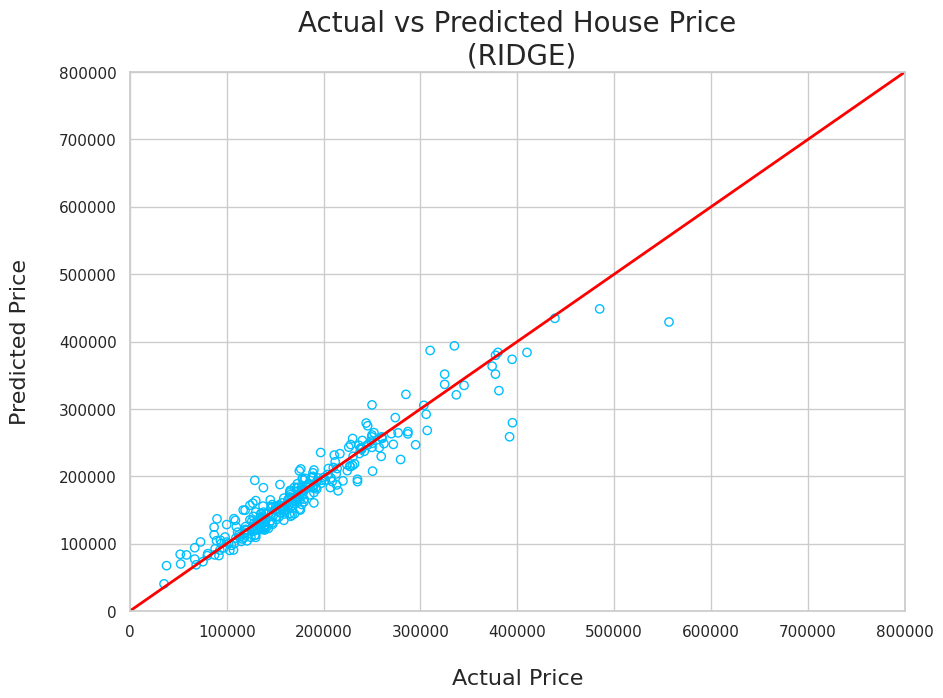

In [228]:
# Plot Actual price vs Predicted price
actual_price = np.exp(y_test["SalePriceLog"])
predicted_price = np.exp(y_pred)

plt.figure()
plt.title("Actual vs Predicted House Price\n (RIDGE)", fontsize=20)
plt.scatter(
    actual_price,
    predicted_price,
    color="deepskyblue",
    marker="o",
    facecolor="none"
)
plt.plot([0, 800000], [0, 800000], "red", lw=2)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()

In [229]:
# Save Ridge Regression Model
import pickle
with open("Ridge_reg_mod.pkl", "wb") as f:
  pickle.dump(ridge_mod, f)

### Lasso Regression

In [230]:
alphas = np.logspace(-5, 5, 50).tolist()

tuned_parameters = {"alpha" : alphas}

lasso_cv = GridSearchCV(Lasso(), tuned_parameters, cv=10, n_jobs=-1, verbose=1)
lasso_cv.fit(X_train, y_train)

print(f"Best Hyperparameters : {lasso_cv.best_params_}")
print(f"Best R²(train) : {lasso_cv.best_score_}")

Fitting 10 folds for each of 50 candidates, totalling 500 fits
Best Hyperparameters : {'alpha': 0.0002682695795279727}
Best R²(train) : 0.9013147169019874


In [231]:
lasso_mod = Lasso(alpha=lasso_cv.best_params_['alpha'])
lasso_mod.fit(X_train, y_train)
y_pred_lasso = lasso_mod.predict(X_test)
print(f"- : {lasso_mod.__class__.__name__}")
print(f"R2 : {rsqr_score(y_test, y_pred_lasso)}")
print(f"RMSE : {rmse_score(y_test, y_pred_lasso)}")

- : Lasso
R2 : 0.9100630934573566
RMSE : 0.1213762128059897


In [232]:
# Save Result
model_list.append(lasso_mod.__class__.__name__)
r2_list.append(round(rsqr_score(y_test, y_pred_lasso), 4))
rmse_list.append(round(rmse_score(y_test, y_pred_lasso), 4))

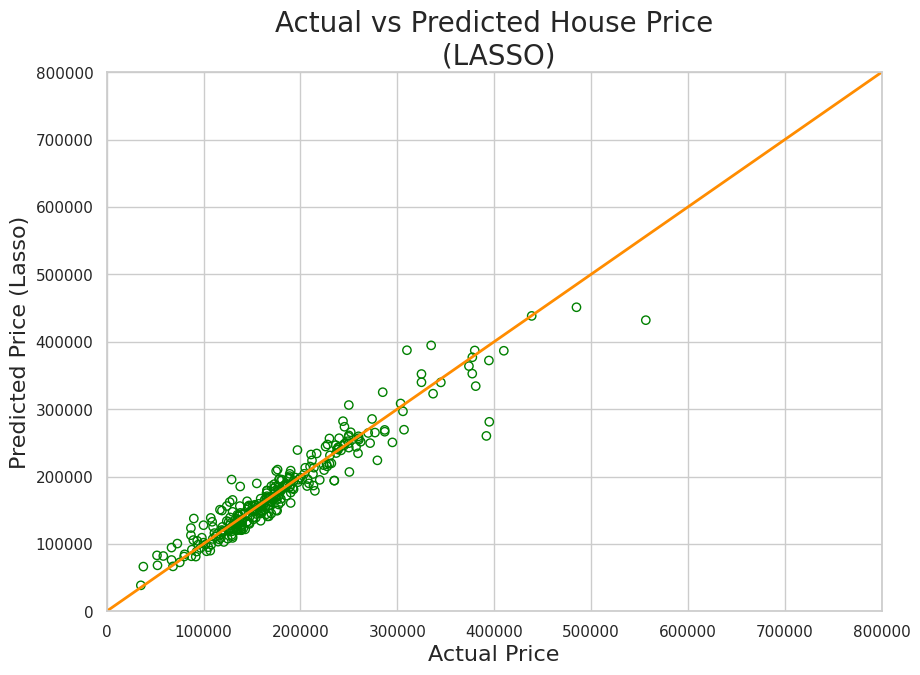

In [233]:
# Plot Actual vs Predicted Lasso
predicted_price_lasso = np.exp(y_pred_lasso)

plt.figure()
plt.title("Actual vs Predicted House Price\n (LASSO)", fontsize=20)
plt.scatter(
    actual_price,
    predicted_price_lasso,
    color="green",
    marker="o",
    facecolors="none"
)
plt.plot([0, 800000], [0, 800000], "darkorange", lw=2)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.xlabel("Actual Price", fontsize=16)
plt.ylabel("Predicted Price (Lasso)", fontsize=16)
plt.show()

### XGBoost Regression

In [234]:
# Define Hyperparamaraters
tuned_parameter = {
    "max_depth" : [3],
    "colsample_bytree" : [0.3, 0.7],
    "learning_rate" : [0.01, 0.05, 0.1],
    "n_estimators" : [100, 500]
}
# GridResearch
xgbr_cv = GridSearchCV(
    estimator=XGBRegressor(),
    param_grid=tuned_parameter,
    cv=5,
    n_jobs=-1,
    verbose=1
)
xgbr_cv.fit(X_train, y_train)
print(f"Best Hyperparameters: {xgbr_cv.best_params_}\n")
print(f"Best R2 : {xgbr_cv.best_score_}")

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Hyperparameters: {'colsample_bytree': 0.3, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 500}

Best R2 : 0.889478564961857


In [235]:
# XGBoost Regressor with best hyperparameters
xgbr_mod = XGBRegressor(
    seed=20,
    colsample_bytree=xgbr_cv.best_params_["colsample_bytree"],
    learning_rate=xgbr_cv.best_params_["learning_rate"],
    max_depth=xgbr_cv.best_params_["max_depth"],
    n_estimators=xgbr_cv.best_params_["n_estimators"]
)
xgbr_mod.fit(X_train, y_train)
y_pred_xgbr = xgbr_mod.predict(X_test)
print(f"- : {xgbr_mod.__class__.__name__}")
print(f"R2 : {rsqr_score(y_test, y_pred_xgbr)}")
print(f"RMSE : {rmse_score(y_test, y_pred_xgbr)}")

- : XGBRegressor
R2 : 0.8971367381508425
RMSE : 0.12980599653120797


In [236]:
# Save Result
model_list.append(xgbr_mod.__class__.__name__)
r2_list.append(round(rsqr_score(y_test, y_pred_xgbr), 4))
rmse_list.append(round(rmse_score(y_test, y_pred_xgbr), 4))

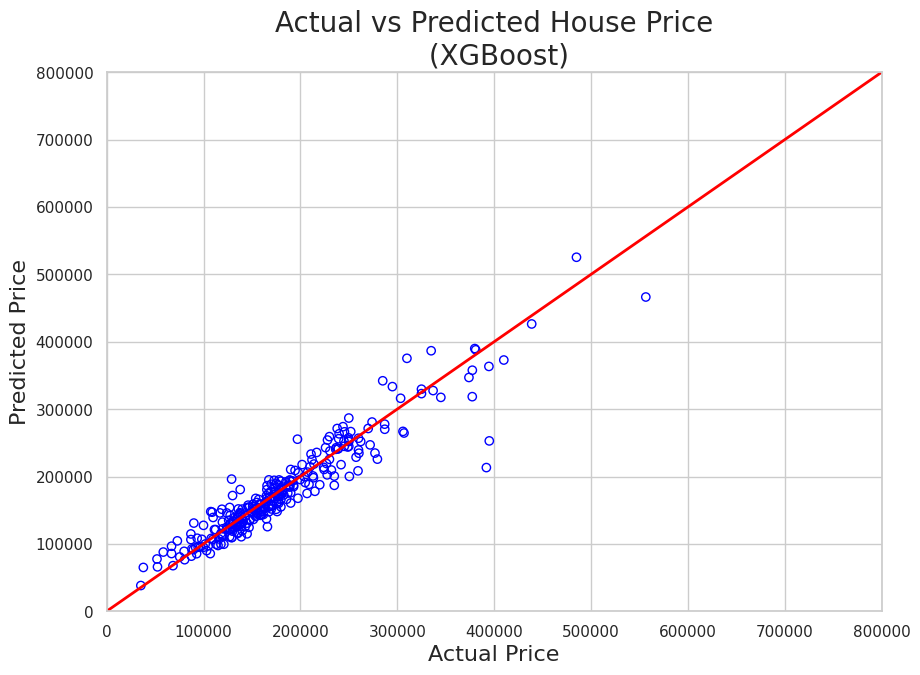

In [237]:
# Plot Actual vs Predicted Price (XGBoost)
actual_price = np.exp(y_test["SalePriceLog"])
predicted_price_xgbr = np.exp(y_pred_xgbr)

plt.figure()
plt.title("Actual vs Predicted House Price\n (XGBoost)", fontsize=20)
plt.scatter(
    actual_price,
    predicted_price_xgbr,
    color="blue",
    marker="o",
    facecolors="none"
)
plt.plot([0, 800000], [0, 800000], "red", lw=2)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.xlabel("Actual Price", fontsize=16)
plt.ylabel("Predicted Price", fontsize=16)
plt.show()

In [238]:
model_list

['Ridge', 'Lasso', 'XGBRegressor']

In [239]:
r2_list

[0.9091, 0.9101, 0.8971]

In [240]:
rmse_list

[0.122, 0.1214, 0.1298]

### LightGBM Regression

In [241]:
# Define hyperparameters for lightGBM
tuned_params = {
    "max_depth" : [3],
    "colsample_bytree" : [0.3, 0.7],
    "learning_rate" : [0.01, 0.05, 0.1],
    "n_estimators" : [100, 500]
}
lgb_cv = GridSearchCV(
    estimator=LGBMRegressor(),
    param_grid=tuned_params,
    cv=5,
    n_jobs=-1,
    verbose=1
)
lgb_cv.fit(X_train, y_train)
print(f"Best Hyperparameters for LGBMRegressor : {lgb_cv.best_params_}\n")
print(f"Best R2 : {lgb_cv.best_score_}")

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001004 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1191
[LightGBM] [Info] Number of data points in the train set: 1163, number of used features: 38
[LightGBM] [Info] Start training from score 12.024392
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

In [242]:
lgb_mod = LGBMRegressor(
    max_depth=lgb_cv.best_params_['max_depth'],
    colsample_bytree=lgb_cv.best_params_['colsample_bytree'],
    learning_rate=lgb_cv.best_params_['learning_rate'],
    n_estimators=lgb_cv.best_params_['n_estimators']
)
lgb_mod.fit(X_train, y_train)
y_pred_lgb = lgb_mod.predict(X_test)
print(f"- : {lgb_mod.__class__.__name__}")
print(f"R2 : {rsqr_score(y_test, y_pred_lgb)}")
print(f"RMSE : {rmse_score(y_test, y_pred_lgb)}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000546 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1191
[LightGBM] [Info] Number of data points in the train set: 1163, number of used features: 38
[LightGBM] [Info] Start training from score 12.024392
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [243]:
# Save Result
model_list.append(lgb_mod.__class__.__name__)
r2_list.append(round(rsqr_score(y_test, y_pred_lgb), 4))
rmse_list.append(round(rmse_score(y_test, y_pred_lgb), 4))

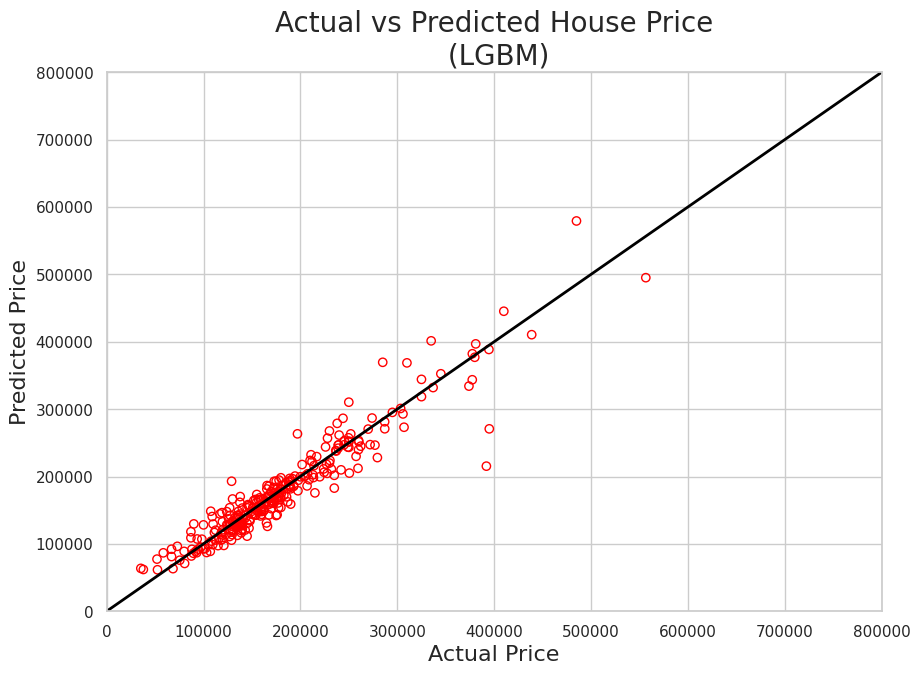

In [244]:
# Plot Actual & Predicted Price (LGBMRegressor)
actual_price = np.exp(y_test["SalePriceLog"])
predicted_price_lgb = np.exp(y_pred_lgb)

plt.figure()
plt.title("Actual vs Predicted House Price\n (LGBM)", fontsize=20)
plt.scatter(
    actual_price,
    predicted_price_lgb,
    color="red",
    marker="o",
    facecolors="none"
)
plt.plot([0, 800000], [0, 800000], "black", lw=2)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.xlabel("Actual Price", fontsize=16)
plt.ylabel("Predicted Price", fontsize=16)
plt.show()

In [245]:
model_list

['Ridge', 'Lasso', 'XGBRegressor', 'LGBMRegressor']

In [246]:
r2_list

[0.9091, 0.9101, 0.8971, 0.8968]

In [247]:
rmse_list

[0.122, 0.1214, 0.1298, 0.13]

In [248]:
# View all result and make conclusion from the result
r2_list_rounded = [round(r2, 4) for r2 in r2_list]
rmse_list_rounded = [round(rmse, 4) for rmse in rmse_list]
result_model = pd.DataFrame({
    "Model" : model_list,
    "R²" : r2_list_rounded,
    "RMSE" : rmse_list_rounded
})
pd.set_option('display.float_format', lambda x: '{:.4f}'.format(x))
result_model

Model     R²   RMSE
0          Ridge 0.9091 0.1220
1          Lasso 0.9101 0.1214
2   XGBRegressor 0.8971 0.1298
3  LGBMRegressor 0.8968 0.1300

**UNTUK PEMILIHAN MODEL TERBAIK BERDASARKAN R2 DAN RMSE ADALAH DIMANA KONDISI R2 TINGGI DAN RMSE RENDAH, DARI KE 4 MODEL , YANG PALING BAIK ADALAH LASSO REGRESSION**